In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
#read the csv with data
house = pd.read_csv("train.csv")
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
house.shape

(1460, 81)

In [4]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## Initial Data Cleaning
We will check the following things in this section:-
1. Treating NaN values
2. Delete Id fields if there are any
3. Check if there are any duplicates in the data

In [6]:
#checking if there are NaN values in data. Turns out there are many NaN values in this dataset.
round(100*(house.isnull().sum()/len(house.index)), 2).to_frame('nulls')

nulls
Id              0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage    17.74
LotArea         0.00
Street          0.00
Alley          93.77
LotShape        0.00
LandContour     0.00
Utilities       0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
OverallCond     0.00
YearBuilt       0.00
YearRemodAdd    0.00
RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.55
MasVnrArea      0.55
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinSF1      0.00
BsmtFinType2    2.60
BsmtFinSF2      0.00
BsmtUnfSF       0.00
TotalBsmtSF     0.00
Heating         0.00
HeatingQC       0.00
CentralAir      0.00
Electrical      0.07
1stFlrSF        0.00
2ndFlrSF        0.00
LowQualFinSF    0.00
GrLivArea       0.00
BsmtFullBath    0.00
BsmtHalfBath    0.00
FullBath        0.00
HalfBath        0.00
BedroomAbvGr    0.00
KitchenAbvGr    0.00
KitchenQual     0.00
TotRmsAbvGrd    0.00
Functional      0.00
Fireplaces      0.00
FireplaceQu    47.26
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageCars      0.00
GarageArea      0.00
GarageQual      5.55
GarageCond      5.55
PavedDrive      0.00
WoodDeckSF      0.00
OpenPorchSF     0.00
EnclosedPorch   0.00
3SsnPorch       0.00
ScreenPorch     0.00
PoolArea        0.00
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
MiscVal         0.00
MoSold          0.00
YrSold          0.00
SaleType        0.00
SaleCondition   0.00
SalePrice       0.00

#### From the data description text note, we have found that some NA values have a business meaning to it. So, we will replace all these NA to their actual meaning instead of removing this data. Following NA values will be treated:-
    Alley: NA -> No alley access
    BsmtQual: NA -> No Basement
    BsmtCond: NA ->	No Basement
    BsmtExposure: NA ->	No Basement
    BsmtFinType1: NA ->	No Basement
    BsmtFinType2: NA ->	No Basement
    FireplaceQu: NA ->	No Fireplace
    GarageType: NA ->	No Garage
    GarageFinish: NA ->	No Garage
    GarageQual: NA ->	No Garage
    GarageCond: NA ->	No Garage
    PoolQC: NA ->	No Pool
    Fence: NA ->	No Fence
    MiscFeature: NA ->	None
    

In [7]:
house['Alley'].fillna('No Alley', inplace=True)
house['BsmtQual'].fillna('No Basement', inplace=True)
house['BsmtCond'].fillna('No Basement', inplace=True)
house['BsmtExposure'].fillna('No Basement', inplace=True)
house['BsmtFinType1'].fillna('No Basement', inplace=True)
house['BsmtFinType2'].fillna('No Basement', inplace=True)
house['FireplaceQu'].fillna('No Fireplace', inplace=True)
house['GarageType'].fillna('No Garage', inplace=True)
house['GarageFinish'].fillna('No Garage', inplace=True)
house['GarageQual'].fillna('No Garage', inplace=True)
house['GarageCond'].fillna('No Garage', inplace=True)
house['PoolQC'].fillna('No Pool', inplace=True)
house['Fence'].fillna('No Fence', inplace=True)
house['MiscFeature'].fillna('None', inplace=True)

In [8]:
#fetching columns which still have NaN values. We will ponder upon fixing these now.
checknulls = round(100*(house.isnull().sum()/len(house.index)), 2).to_frame('nulls').reset_index()
checknulls[checknulls['nulls']>0]

index  nulls
3   LotFrontage  17.74
25   MasVnrType   0.55
26   MasVnrArea   0.55
42   Electrical   0.07
59  GarageYrBlt   5.55

#### From data description, I have deduced the following points:-
    1. LotFrontage - NAN values means there is no street connected to property so value will be 0
    2. MasVnrType - NAN values are 'None'
    3. MasVnrArea - Area will be 0 if it is doesn't exist
    4. Electrical has only 1 NAN value which will impute with mode value of the column
    5. GarageYrBlt has NAN values where there is No garage but since it's a numeric date column we can't impute it now.

In [9]:
house['LotFrontage'].fillna(0, inplace=True) 
house['MasVnrType'].fillna('None', inplace=True)
house['MasVnrArea'].fillna(0, inplace=True) 
house['Electrical'].fillna(house['Electrical'].mode()[0], inplace=True)

In [10]:
#fetching columns which still have NaN values. We will ponder upon fixing these now.
#We are left with only 1 column GarageYrBlt which has null values. We will do EDA and then decide on imputation
checknulls = round(100*(house.isnull().sum()/len(house.index)), 2).to_frame('nulls').reset_index()
checknulls[checknulls['nulls']>0]

index  nulls
59  GarageYrBlt   5.55

#### Note regarding GarageYrBlt:- The values which are not NaN are highly correlated with yearbuilt and NaN values depicts that there is no garage in the house. No garage information has been covered by a dummy variable called 'GarageType_No Garage' later on. So, it is safe to delete this column as we won't be losing much information.

In [11]:
#id is just an Id field and can't be used for any predictions
house.drop('Id', axis=1, inplace=True)

In [12]:
#checking if there are any duplicates. Turns out there aren't any duplicates in this data so we are good.
len(house.drop_duplicates())

1460

## Data Visualization, EDA and Data Cleaning
We will visualize data to find out the relationships between various columns and do EDA. Our aim will be to:-
    1. Understand data with help of visualization
    2. Treat Multicollinearity as much as possible using correlation heatmap
    3. Check if some columns are highly skewed and drop them if we find any

In [13]:
# Checking the number of categorical and numeric features we have
print(house.select_dtypes(exclude=['object']).shape)
print(house.select_dtypes(include=['object']).shape)

(1460, 37)
(1460, 43)


##### 1. Numeric Data EDA

(37.0, 0.0)

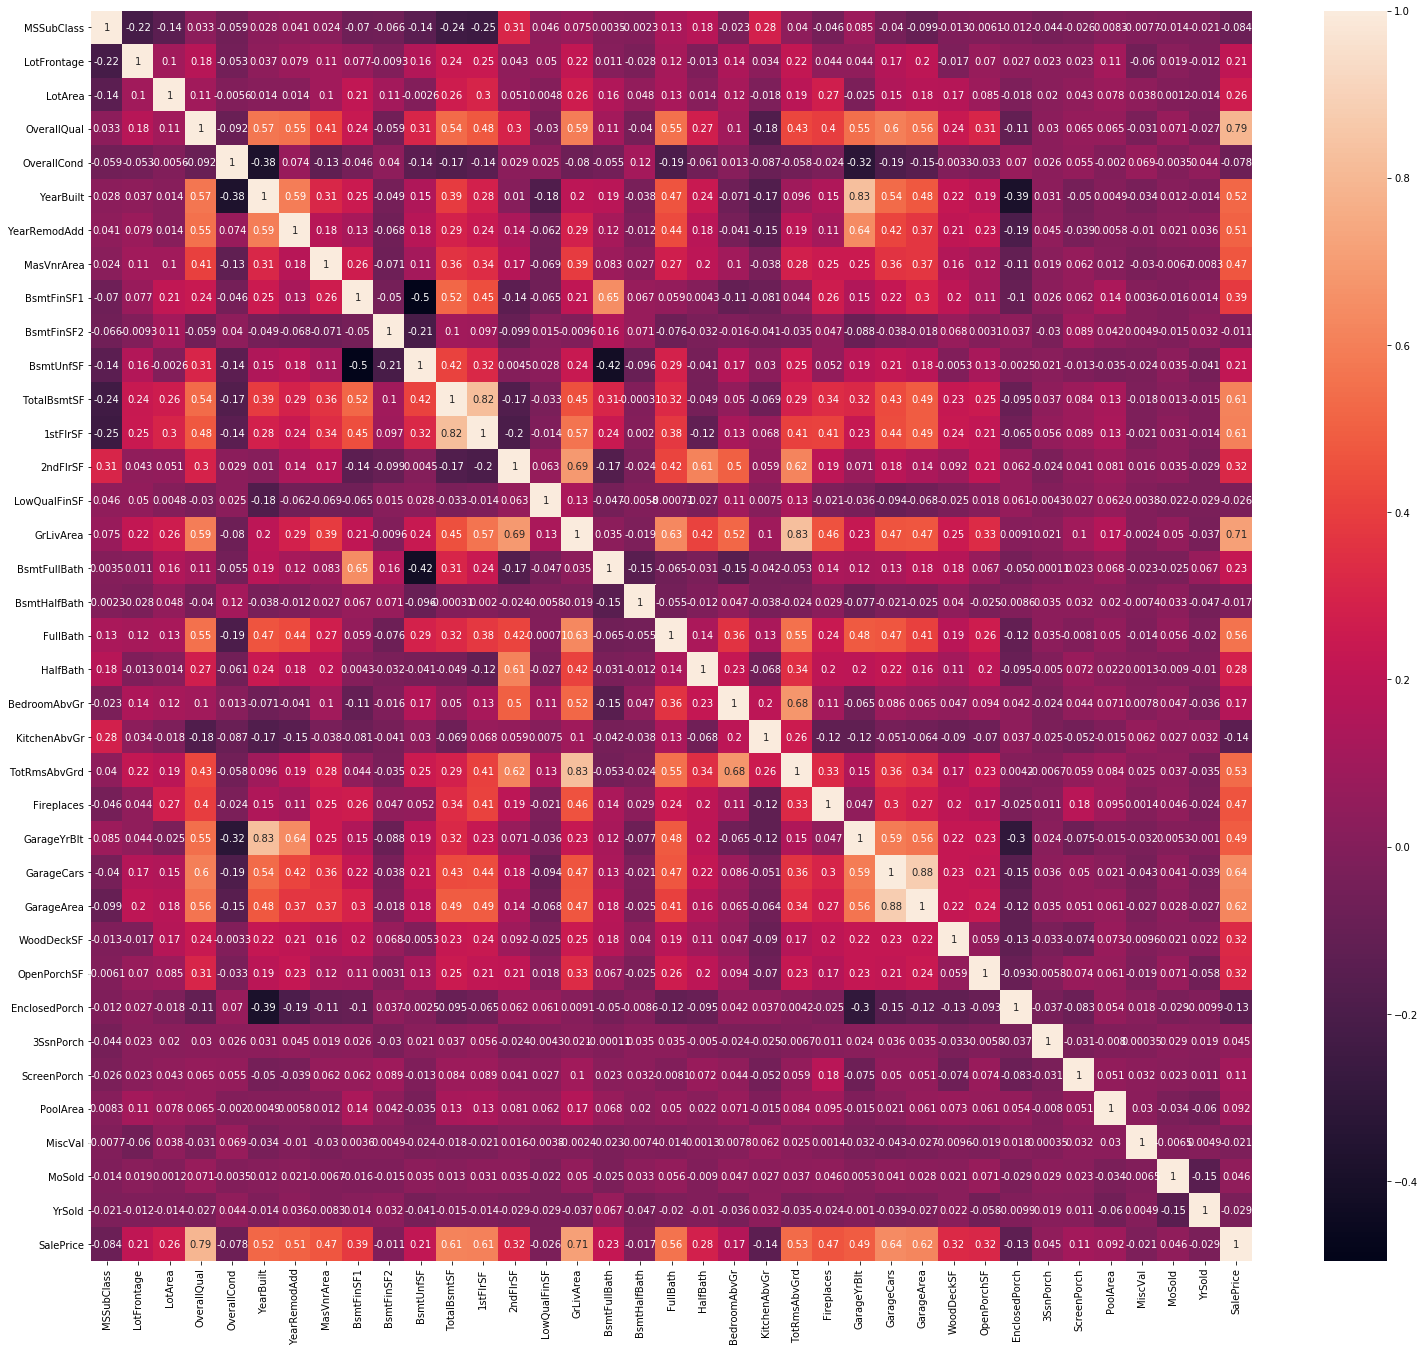

In [14]:
plt.figure(figsize=(26,23))
ax = sns.heatmap(house.select_dtypes(exclude=['object']).corr(), annot = True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

In [15]:
#printing columns which have correlation higher than 0.8
house_numeric_corr = house.select_dtypes(exclude=['object']).corr()
house_numeric_corr[(house_numeric_corr.abs()>0.8) & (house_numeric_corr.abs()!=1)].dropna(how='all').dropna(axis=1, how='all')

YearBuilt  TotalBsmtSF  1stFlrSF  GrLivArea  TotRmsAbvGrd  \
YearBuilt           NaN          NaN       NaN        NaN           NaN   
TotalBsmtSF         NaN          NaN   0.81953        NaN           NaN   
1stFlrSF            NaN      0.81953       NaN        NaN           NaN   
GrLivArea           NaN          NaN       NaN        NaN      0.825489   
TotRmsAbvGrd        NaN          NaN       NaN   0.825489           NaN   
GarageYrBlt    0.825667          NaN       NaN        NaN           NaN   
GarageCars          NaN          NaN       NaN        NaN           NaN   
GarageArea          NaN          NaN       NaN        NaN           NaN   

              GarageYrBlt  GarageCars  GarageArea  
YearBuilt        0.825667         NaN         NaN  
TotalBsmtSF           NaN         NaN         NaN  
1stFlrSF              NaN         NaN         NaN  
GrLivArea             NaN         NaN         NaN  
TotRmsAbvGrd          NaN         NaN         NaN  
GarageYrBlt           NaN         NaN         NaN  
GarageCars            NaN         NaN    0.882475  
GarageArea            NaN    0.882475         NaN

#### List of highly correlated columns are:-
    1. GarageYrBlt and YearBuilt - Since GarageYrBlt has some NaN values so we will drop it.
    2. 1stFlrSF and TotalBsmtSF - since 1st floor surface area is dependent on basement area. We drop TotalBsmtSF
    3. TotRmsAbvGrd and GrLivArea - Drop TotRmsAbvGrd since GrLivArea is highly correlated with SalePrice
    4. GarageArea and GarageCars - Drop GarageCars

In [16]:
house.drop(['GarageYrBlt','TotRmsAbvGrd','TotalBsmtSF', 'GarageCars'], axis=1, inplace=True)

#### Note regarding GarageYrBlt:- The values which are not NaN are highly correlated with yearbuilt and NaN values depicts that there is no garage in the house. No garage information has been covered by a dummy variable called 'GarageType_No Garage' later on. So, it is safe to delete this column as we won't be losing much information.

<Figure size 14400x14400 with 0 Axes>

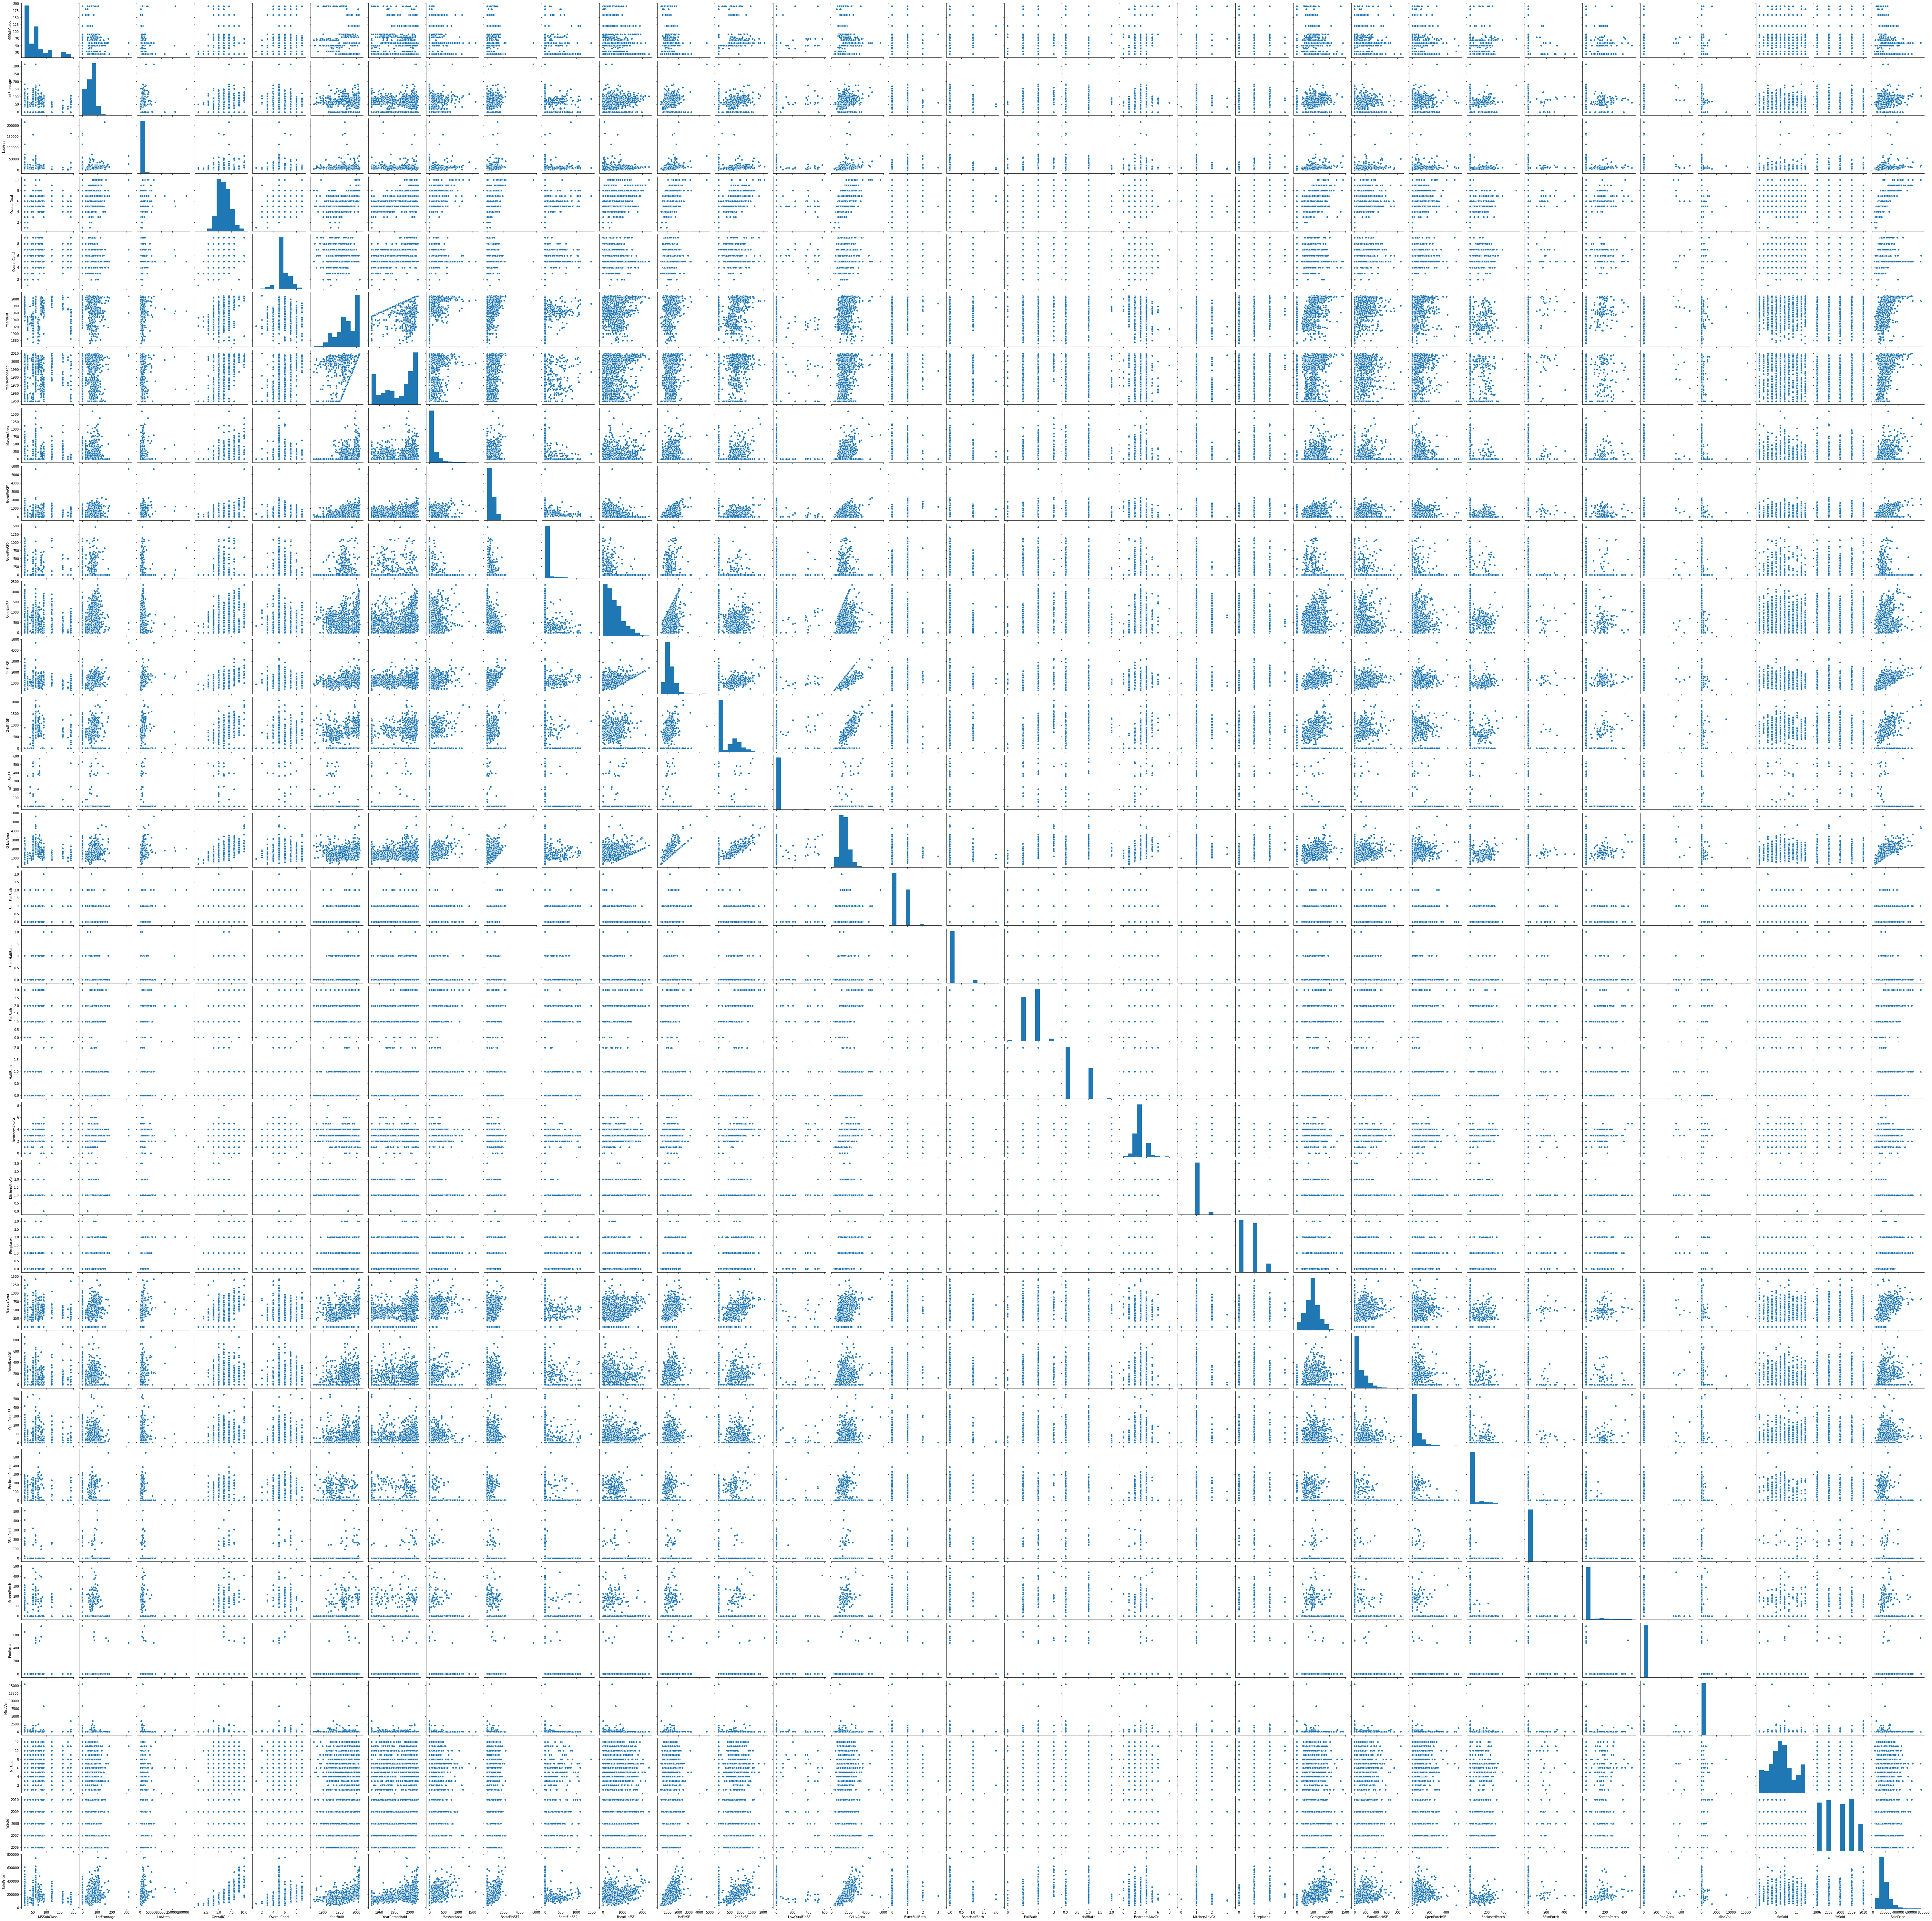

In [17]:
plt.figure(figsize=(200, 200))
sns.pairplot(house.select_dtypes(exclude=['object']))

#### Analysis: From above pairplot and heatmap, we have drawn the following inferences. 
1. 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'MoSold', 'YrSold' are not numeric by nature but are categorical.
2. OverallQual, GrLivArea, 1stFlrSF show high positive correlation with SalePrice
3. By looking at the above scatter plots I can see fields 'PoolArea', 'MiscVal', 'LotArea' with evident outliers, so we will do something to treat these later.

In [18]:
#converting all categorical variables from numeric to object
numeric_categorical_variables = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'MoSold', 'YrSold']
house[numeric_categorical_variables] = house[numeric_categorical_variables].astype('object')

In [19]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460

In [20]:
#Saving numeric data for future use
numeric_vars = house.select_dtypes(exclude=['object']).columns

In [21]:
#We have 21 numeric columns
numeric_vars.shape

(21,)

##### 2. Categorical columns EDA

In [22]:
#saving categorial data for future use
categorical_vars = house.select_dtypes(include=['object']).columns
house.select_dtypes(include=['object'])

MSSubClass MSZoning Street     Alley LotShape LandContour Utilities  \
0            60       RL   Pave  No Alley      Reg         Lvl    AllPub   
1            20       RL   Pave  No Alley      Reg         Lvl    AllPub   
2            60       RL   Pave  No Alley      IR1         Lvl    AllPub   
3            70       RL   Pave  No Alley      IR1         Lvl    AllPub   
4            60       RL   Pave  No Alley      IR1         Lvl    AllPub   
...         ...      ...    ...       ...      ...         ...       ...   
1455         60       RL   Pave  No Alley      Reg         Lvl    AllPub   
1456         20       RL   Pave  No Alley      Reg         Lvl    AllPub   
1457         70       RL   Pave  No Alley      Reg         Lvl    AllPub   
1458         20       RL   Pave  No Alley      Reg         Lvl    AllPub   
1459         20       RL   Pave  No Alley      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3       Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          FR2       Gtl      NoRidge       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1455    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1456    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
1457    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
1458    Inside       Gtl        NAmes       Norm       Norm     1Fam   
1459    Inside       Gtl      Edwards       Norm       Norm     1Fam   

     HouseStyle OverallQual OverallCond RoofStyle RoofMatl Exterior1st  \
0        2Story           7           5     Gable  CompShg     VinylSd   
1        1Story           6           8     Gable  CompShg     MetalSd   
2        2Story           7           5     Gable  CompShg     VinylSd   
3        2Story           7           5     Gable  CompShg     Wd Sdng   
4        2Story           8           5     Gable  CompShg     VinylSd   
...         ...         ...         ...       ...      ...         ...   
1455     2Story           6           5     Gable  CompShg     VinylSd   
1456     1Story           6           6     Gable  CompShg     Plywood   
1457     2Story           7           9     Gable  CompShg     CemntBd   
1458     1Story           5           6       Hip  CompShg     MetalSd   
1459     1Story           5           6     Gable  CompShg     HdBoard   

     Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0        VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
1        MetalSd       None        TA        TA     CBlock       Gd       TA   
2        VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
3        Wd Shng       None        TA        TA     BrkTil       TA       Gd   
4        VinylSd    BrkFace        Gd        TA      PConc       Gd       TA   
...          ...        ...       ...       ...        ...      ...      ...   
1455     VinylSd       None        TA        TA      PConc       Gd       TA   
1456     Plywood      Stone        TA        TA     CBlock       Gd       TA   
1457     CmentBd       None        Ex        Gd      Stone       TA       Gd   
1458     MetalSd       None        TA        TA     CBlock       TA       TA   
1459     HdBoard       None        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0              No          GLQ          Unf    GasA        Ex          Y   
1              Gd          ALQ          Unf    GasA        Ex          Y   
2              Mn          GLQ          Unf    GasA        Ex          Y   
3              No          ALQ          Unf    GasA        Gd          Y 

In [23]:
#We have 55 categorical columns
categorical_vars.shape

(55,)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']


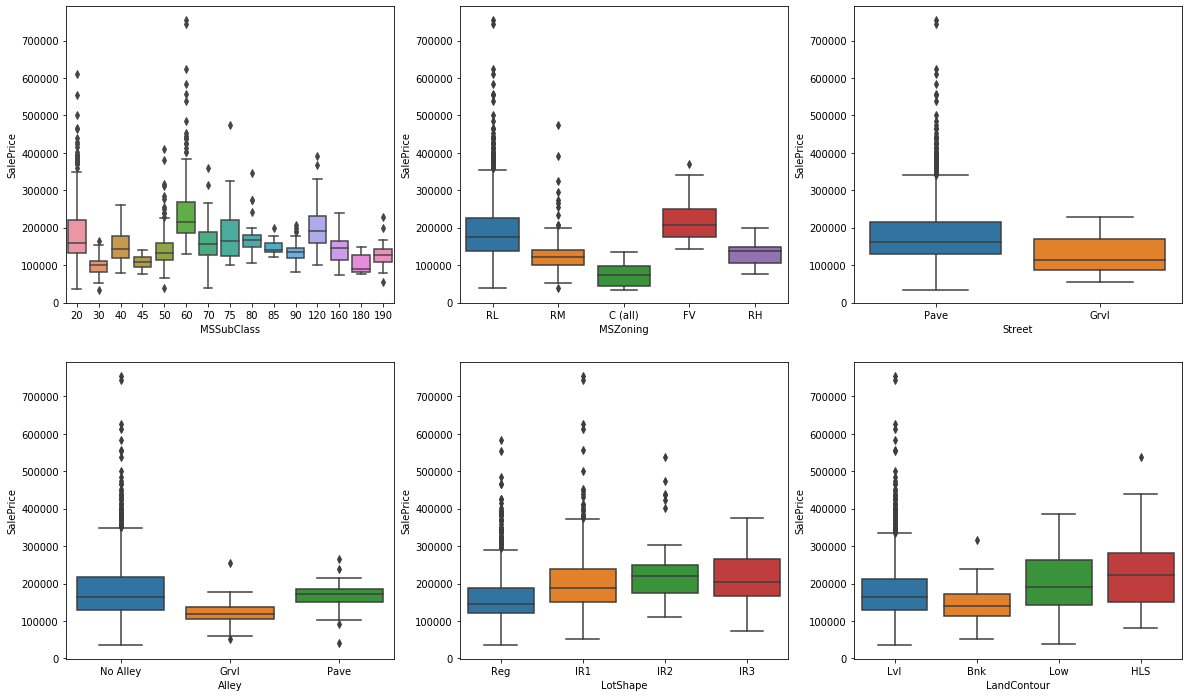

['Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']


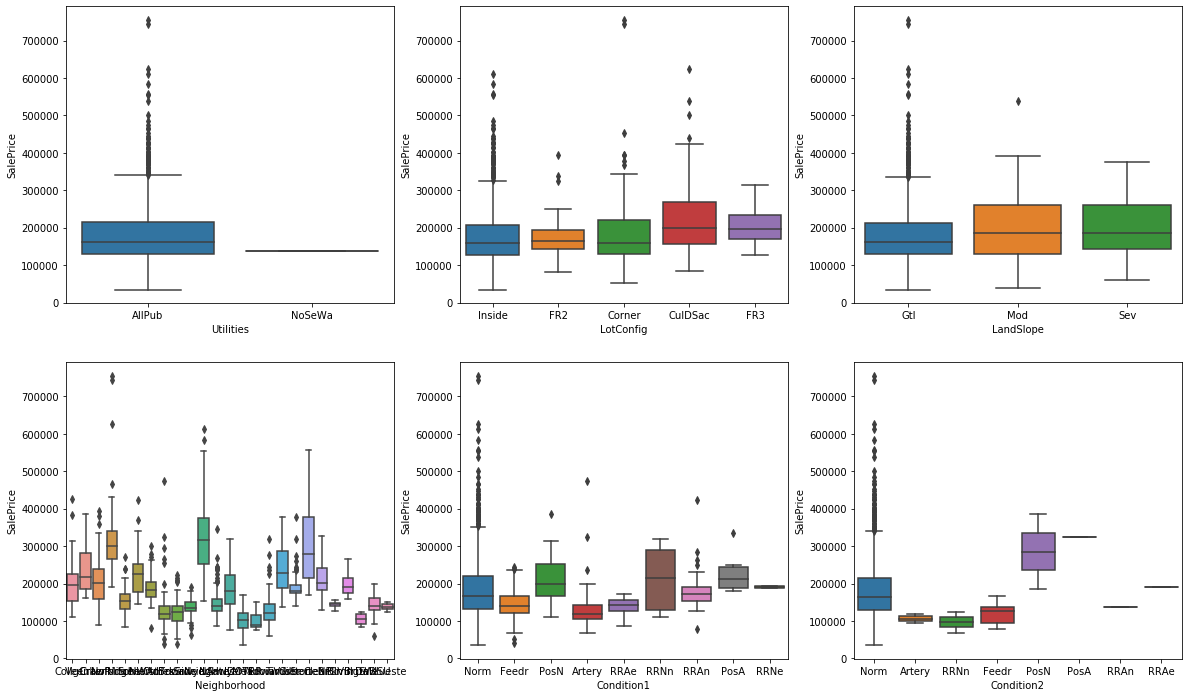

['BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl']


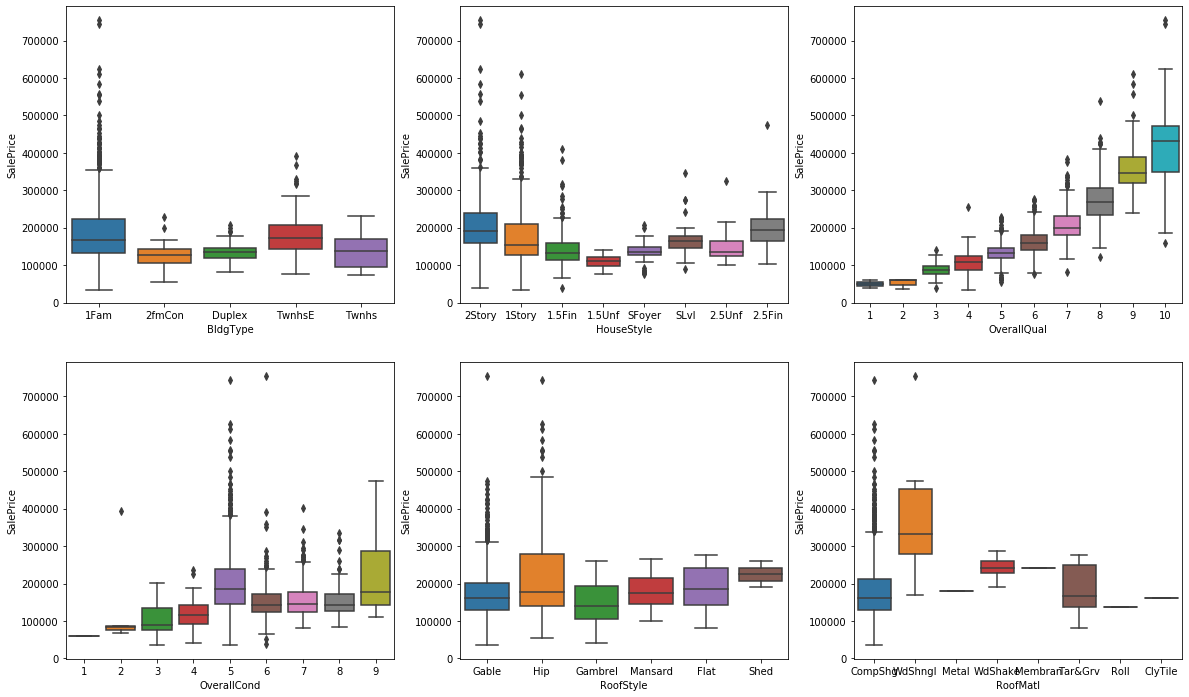

['Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation']


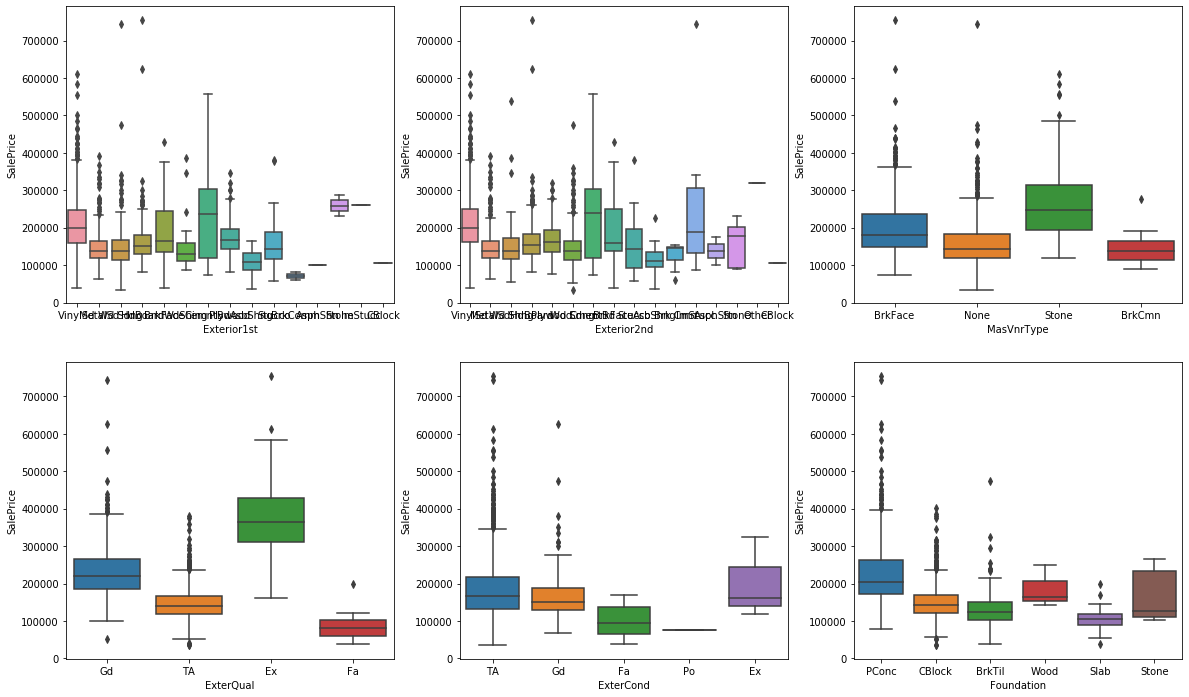

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating']


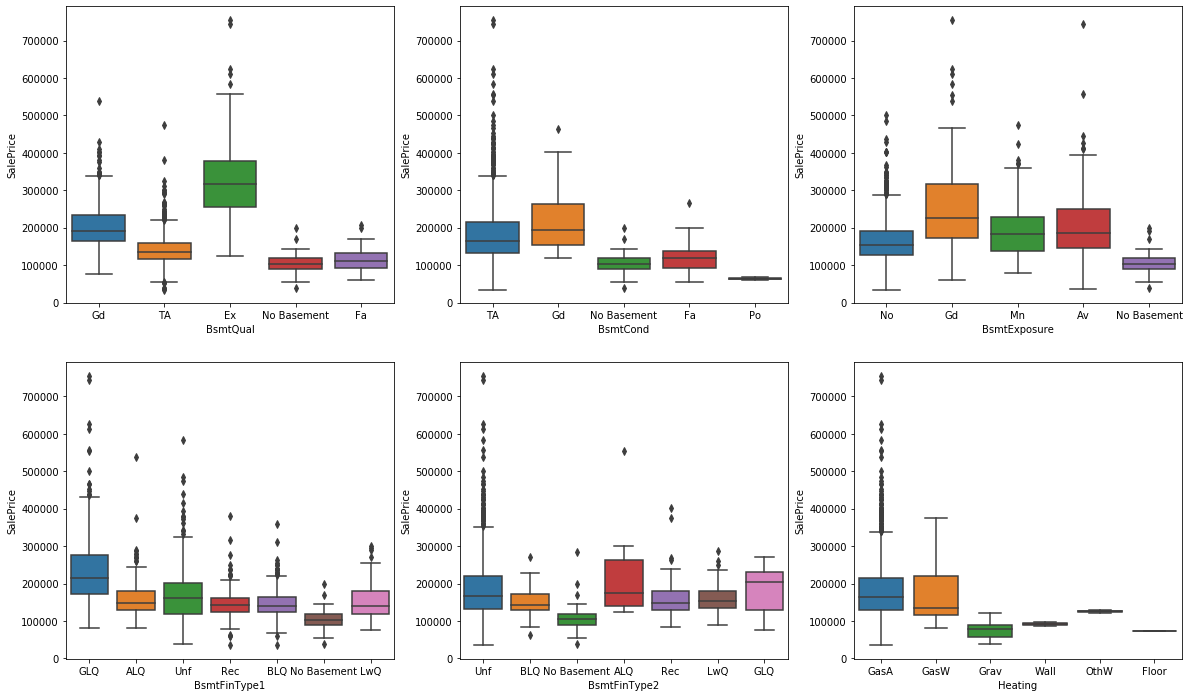

['HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath']


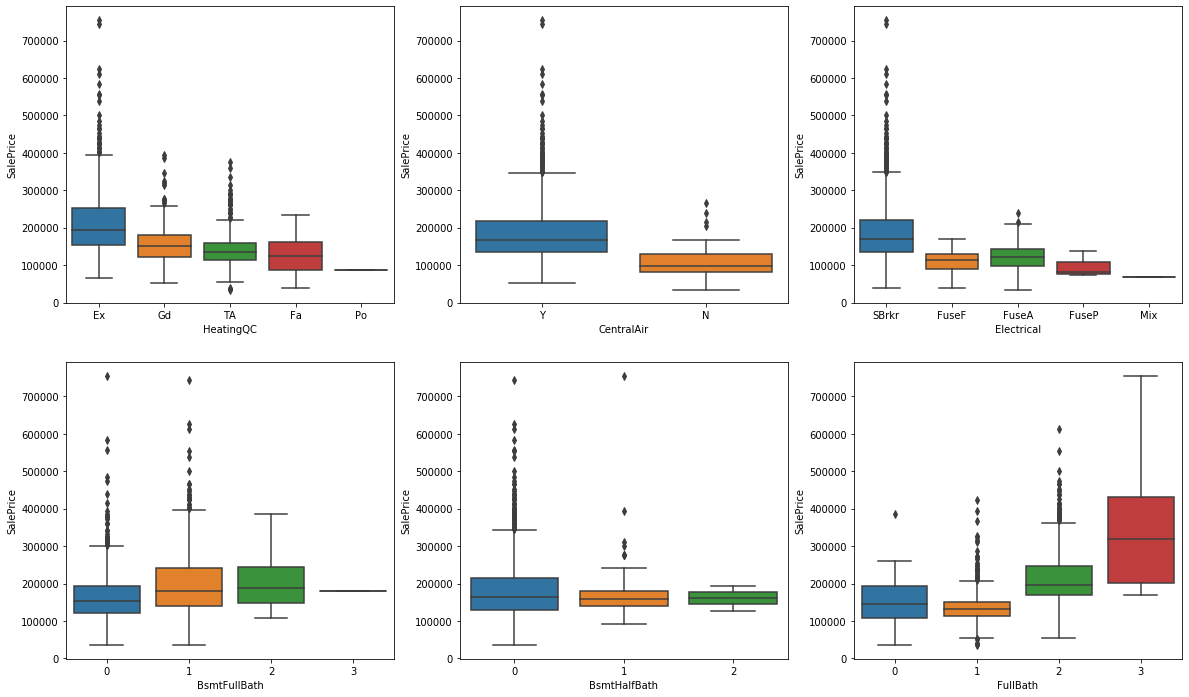

['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces']


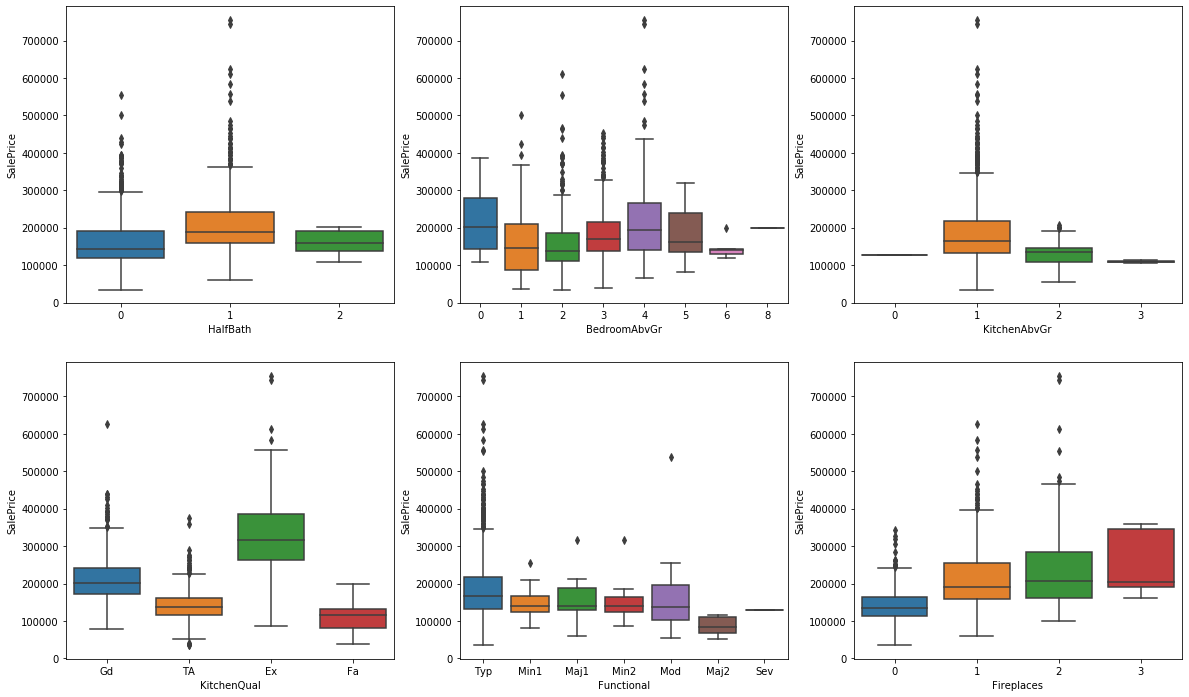

['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']


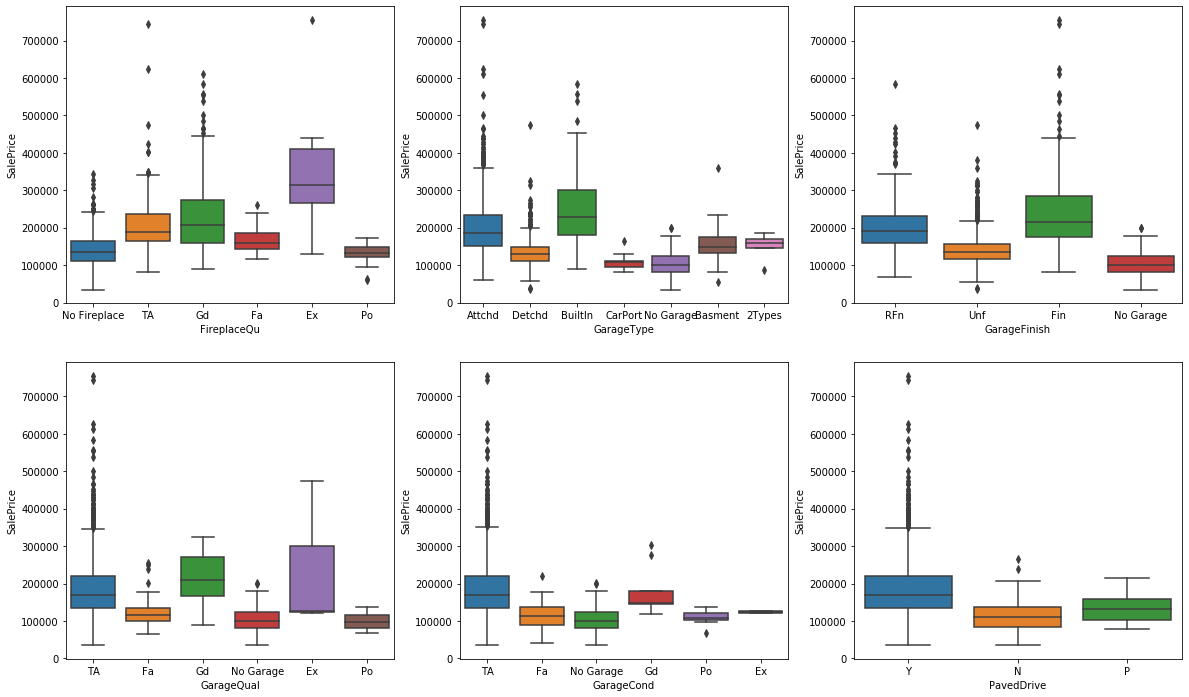

['PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType']


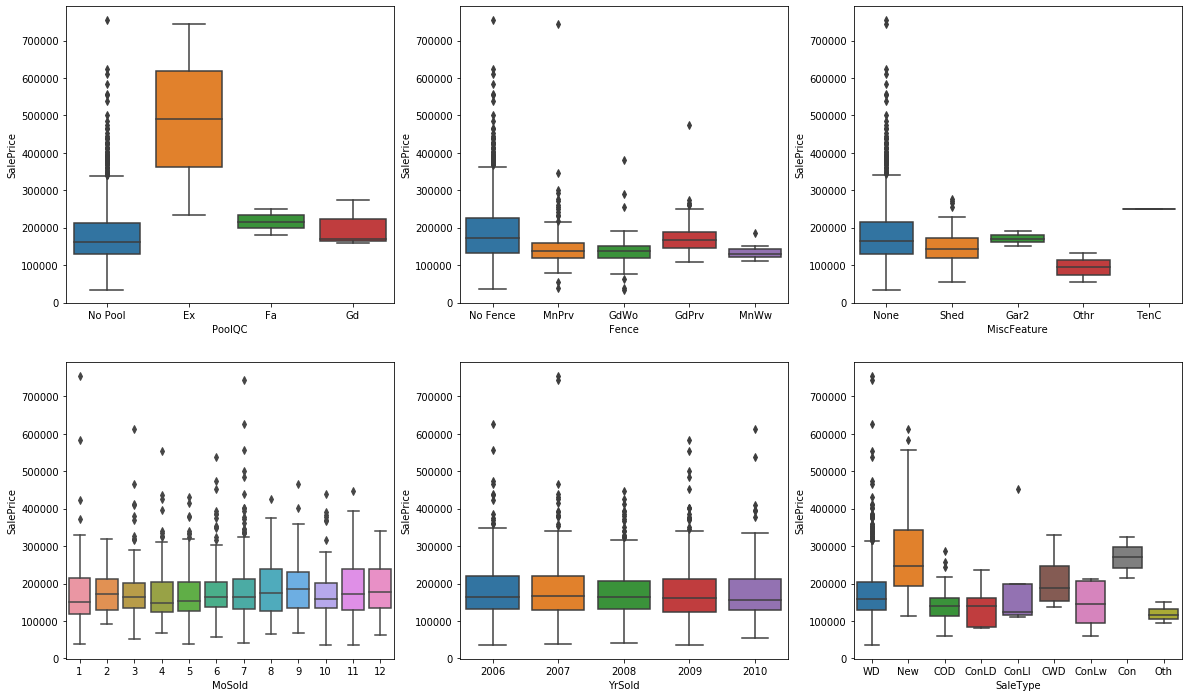

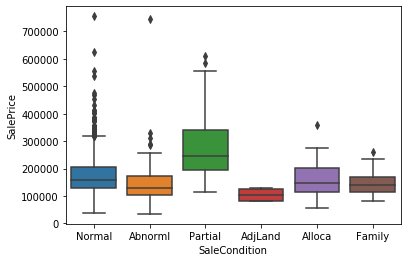

In [24]:
# To find relationship between SalePrice and Categorical variable, i am visualizing salePrice boxplots grouped by
#all categrical variables.
#Please use scroll to see all boxplots
for i in range(len(categorical_vars)//6):
    cat_list = []
    for j in range(6):
        cat_list.append(categorical_vars[i*6 + j])
    print(cat_list)
    plt.figure(figsize=(20, 12))
    plt.subplot(2,3,1)
    sns.boxplot(x = cat_list[0], y = 'SalePrice', data = house)
    plt.subplot(2,3,2)
    sns.boxplot(x = cat_list[1], y = 'SalePrice', data = house)
    plt.subplot(2,3,3)
    sns.boxplot(x = cat_list[2], y = 'SalePrice', data = house)
    plt.subplot(2,3,4)
    sns.boxplot(x = cat_list[3], y = 'SalePrice', data = house)
    plt.subplot(2,3,5)
    sns.boxplot(x = cat_list[4], y = 'SalePrice', data = house)
    plt.subplot(2,3,6)
    sns.boxplot(x = cat_list[5], y = 'SalePrice', data = house)
    plt.show() 
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = house)

#### Analysis (Please scroll the above section to see all box plots): 
1. OverallQual shows very evident incremental relationship with SalePrice
2. There are many categories which are highly skewed so we will have to fix it in Data Preparation

##### Feature columns Skewness check and treatment

In [25]:
#fetching categorical columns which are highly skewed
skewedCols = []
for i in categorical_vars:
    if (house[i].value_counts()/len(house[i])).max()>0.85:
        skewedCols.append(i)
print(skewedCols)
print(len(skewedCols))

['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType']
23


In [26]:
#We can drop these highly skewed colums from our dataset
house.drop(skewedCols, axis=1, inplace=True)

In [27]:
#updating the categorical variables list after dropping skewed categorical columns
categorical_vars = house.select_dtypes(include=['object']).columns

In [28]:
#fetching numeric columns which are highly skewed
#For Numeric variables we are putting a stricter cut off of 95% 
skewednumericCols = []
for i in numeric_vars:
    if (house[i].value_counts()/len(house[i])).max()>0.95:
        skewednumericCols.append(i)
print(skewednumericCols)
print(len(skewednumericCols))

['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']
4


In [29]:
#We can drop these highly skewed colums from our dataset
house.drop(skewednumericCols, axis=1, inplace=True)

In [30]:
#updating the numeric variables list after dropping skewed categorical columns
numeric_vars = house.select_dtypes(exclude=['object']).columns

In [31]:
house.shape

(1460, 49)

### Data Preparation

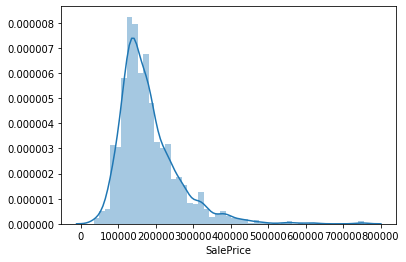

In [32]:
#Checking the distribution of SalePrice
sns.distplot(house['SalePrice'])

We can see from above distribution plot that the target variable "SalePrice" is highly skewed. We don't want to delete the data because it will mean loss of important information. So, we will log transform it and see if the distribution normalizes or not.

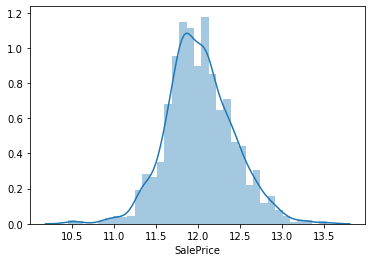

In [33]:
#We can see that after the log transform, SalePrice has normalized a lot. 
sns.distplot(np.log(house['SalePrice']))

In [34]:
house['SalePrice'] = np.log(house['SalePrice'])

In [35]:
house.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0         60       RL         65.0     8450      Reg    Inside      CollgCr   
1         20       RL         80.0     9600      Reg       FR2      Veenker   
2         60       RL         68.0    11250      IR1    Inside      CollgCr   
3         70       RL         60.0     9550      IR1    Corner      Crawfor   
4         60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle OverallQual OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     2Story           7           5       2003          2003   
1     1Fam     1Story           6           8       1976          1976   
2     1Fam     2Story           7           5       2001          2002   
3     1Fam     2Story           7           5       1915          1970   
4     1Fam     2Story           8           5       2000          2000   

  RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable     MetalSd     MetalSd       None         0.0        TA   
2     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd   

  Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  \
0      PConc       Gd           No          GLQ         706           0   
1     CBlock       Gd           Gd          ALQ         978           0   
2      PConc       Gd           Mn          GLQ         486           0   
3     BrkTil       TA           No          ALQ         216           0   
4      PConc       Gd           Av          GLQ         655           0   

   BsmtUnfSF HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea BsmtFullBath FullBath  \
0        150        Ex       856       854       1710            1        2   
1        284        Ex      1262         0       1262            0        2   
2        434        Ex       920       866       1786            1        2   
3        540        Gd       961       756       1717            1        1   
4        490        Ex      1145      1053       2198            1        2   

  HalfBath BedroomAbvGr KitchenQual Fireplaces   FireplaceQu GarageType  \
0        1            3          Gd          0  No Fireplace     Attchd   
1        0            3          TA          1            TA     Attchd   
2        1            3          Gd          1            TA     Attchd   
3        0            3          Gd          1            Gd     Detchd   
4        1            4          Gd          1            TA     Attchd   

  GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0          RFn         548           0           61              0   
1          RFn         460         298            0              0   
2          RFn         608           0           42              0   
3          Unf         642           0           35            272   
4          RFn         836         192           84              0   

   ScreenPorch     Fence MoSold YrSold SaleCondition  SalePrice  
0            0  No Fence      2   2008        Normal  12.247694  
1            0  No Fence      5   2007        Normal  12.109011  
2            0  No Fence      9   2008        Normal  12.317167  
3            0  No Fence      2   2006       Abnorml  11.849398  
4            0  No Fence     12   2008        Normal  12.429216

In [36]:
#verifying the number of numeric and categorical columns
print(house.shape[1])
print(len(categorical_vars))
print(len(numeric_vars))

49
32
17


##### Dummy variables creation from categorical variables

In [37]:
house = pd.get_dummies(house, drop_first=True)

In [38]:
house.shape

(1460, 216)

In [39]:
house_corr = house.corr()
house_corr[(house_corr.abs()>0.8) & (house_corr.abs()!=1)].dropna(how='all').dropna(axis=1, how='all').apply(lambda row: row.first_valid_index(), axis=1)

2ndFlrSF                           HouseStyle_2Story
MSSubClass_45                      HouseStyle_1.5Unf
MSSubClass_80                        HouseStyle_SLvl
MSSubClass_190                       BldgType_2fmCon
MSZoning_FV                     Neighborhood_Somerst
MSZoning_RL                              MSZoning_RM
MSZoning_RM                              MSZoning_RL
Neighborhood_Somerst                     MSZoning_FV
BldgType_2fmCon                       MSSubClass_190
HouseStyle_1.5Unf                      MSSubClass_45
HouseStyle_2Story                           2ndFlrSF
HouseStyle_SLvl                        MSSubClass_80
RoofStyle_Gable                        RoofStyle_Hip
RoofStyle_Hip                        RoofStyle_Gable
Exterior1st_CemntBd              Exterior2nd_CmentBd
Exterior1st_HdBoard              Exterior2nd_HdBoard
Exterior1st_MetalSd              Exterior2nd_MetalSd
Exterior1st_VinylSd              Exterior2nd_VinylSd
Exterior1st_Wd Sdng              Exterior2nd_W

##### From above data, we have found that the following variables are highly correlated with other features in our dataset. So to reduce multicollinearity, we will drop all of these:-
'2ndFlrSF', 'HouseStyle_1.5Unf', 'HouseStyle_SLvl', 'BldgType_2fmCon',  'Neighborhood_Somerst', 'MSZoning_RL', 'RoofStyle_Hip', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd','Exterior2nd_VinylSd',  'Exterior2nd_Wd Sdng', 'MasVnrType_None', 'ExterQual_TA', 'BsmtQual_No Basement', 'BsmtFinType1_No Basement', 'FullBath_2', 'KitchenQual_TA', 'FireplaceQu_No Fireplace'

In [40]:
high_corr_vars = ['2ndFlrSF', 'HouseStyle_1.5Unf', 'HouseStyle_SLvl', 'BldgType_2fmCon',  'Neighborhood_Somerst', 'MSZoning_RL', 'RoofStyle_Hip', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd','Exterior2nd_VinylSd',  'Exterior2nd_Wd Sdng', 'MasVnrType_None', 'ExterQual_TA', 'BsmtQual_No Basement', 'BsmtFinType1_No Basement', 'FullBath_2', 'KitchenQual_TA', 'FireplaceQu_No Fireplace']  
house.drop(high_corr_vars, axis=1, inplace=True)

In [41]:
#fetching columns which have binary values and they are all of the same type or apart from 1 value rest are same
singleValueCols = []
for i in house.columns:
    if (house[i].nunique()==2) & (house[i].value_counts().min()<2):
        singleValueCols.append(i)
singleValueCols

['Exterior1st_AsphShn',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior2nd_CBlock',
 'Exterior2nd_Other',
 'HeatingQC_Po',
 'BsmtFullBath_3',
 'BedroomAbvGr_8']

In [42]:
#dropping skewed columns - columns with onl
house.drop(singleValueCols, axis=1, inplace=True)

In [43]:
# Converting year into number of years  - derived features
# We are left with YearBuilt and YearRemodAdd year columns. We deleted GarageYrBlt because it was highly
# correlated with yearBult and I considered yearSold as a categorical variable
#the current year is 2020 so subtracting years from 2020 to get the number of years
house['YearBuilt'] = 2020 - house['YearBuilt']
house['YearRemodAdd'] = 2020 - house['YearRemodAdd']

In [44]:
numeric_vars

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SalePrice'],
      dtype='object')

In [45]:
#updating the numeric variables list after dropping skewed categorical columns
numeric_vars = list(numeric_vars)
numeric_vars.remove('2ndFlrSF')

In [46]:
numeric_vars

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [47]:
house.shape

(1460, 189)

In [48]:
house.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450         17            17       196.0         706   
1         80.0     9600         44            44         0.0         978   
2         68.0    11250         19            18       162.0         486   
3         60.0     9550        105            50         0.0         216   
4         84.0    14260         20            20       350.0         655   

   BsmtFinSF2  BsmtUnfSF  1stFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0           0        150       856       1710         548           0   
1           0        284      1262       1262         460         298   
2           0        434       920       1786         608           0   
3           0        540       961       1717         642           0   
4           0        490      1145       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  MSSubClass_30  \
0           61              0            0  12.247694              0   
1            0              0            0  12.109011              0   
2           42              0            0  12.317167              0   
3           35            272            0  11.849398              0   
4           84              0            0  12.429216              0   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              1              0   
1              0              0              0              0              0   
2              0              0              0              1              0   
3              0              0              0              0              1   
4              0              0              0              1              0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0              0               0   
1              0              0              0              0               0   
2              0              0              0              0               0   
3              0              0              0              0               0   
4              0              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3               0               0               0            0            0   
4               0               0               0            0            0   

   MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
0            0             0             0             1                  0   
1            0             0             0             1                  0   
2            0             0             0             0                  0   
3            0             0             0             0                  0   
4            0             0             0             0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
0              0              0                 1                     0   
1              1              0                 0                     0   
2              0              0                 1                     0   
3              0              0                 0                     0   
4              1              0                 0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0   

### Splitting the Data into Training and Testing Sets

In [49]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(house, train_size = 0.7, test_size = 0.3, random_state = 100)

In [50]:
print(df_train.shape)
print(df_test.shape)

(1021, 189)
(438, 189)


### Rescaling the Features 

In [51]:
y_train = df_train.pop('SalePrice')
#updating the numeric variables list after dropping skewed categorical columns
numeric_vars.remove('SalePrice')
numeric_vars

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [52]:
#we will use Standard scaling for our model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
210          67.0     5604         95            70         0.0         468   
318          90.0     9900         27            27       256.0         987   
239          52.0     8741         75            70         0.0          94   
986          59.0     5310        110            17         0.0           0   
1416         60.0    11340        135            70         0.0           0   

      BsmtFinSF2  BsmtUnfSF  1stFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
210            0        396       864        864           0           0   
318            0        360      1372       2646         656         340   
239            0        641       798       1487         220           0   
986            0        485      1001       1635         255         394   
1416           0        777      1246       2290         560           0   

      OpenPorchSF  EnclosedPorch  ScreenPorch  MSSubClass_30  MSSubClass_40  \
210             0             96            0              1              0   
318            60            144            0              0              0   
239           140              0            0              0              0   
986             0              0            0              0              0   
1416            0            114            0              0              0   

      MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
210               0              0              0              0   
318               0              0              1              0   
239               0              1              0              0   
986               0              1              0              0   
1416              0              0              0              0   

      MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
210               0              0              0              0   
318               0              0              0              0   
239               0              0              0              0   
986               0              0              0              0   
1416              0              0              0              0   

      MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
210                0               0               0               0   
318                0               0               0               0   
239                0               0               0               0   
986                0               0               0               0   
1416               0               0               0               1   

      MSZoning_FV  MSZoning_RH  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
210             0            0            0             0             0   
318             0            0            0             0             0   
239             0            0            0             0             0   
986             0            0            1             0             0   
1416            0            0            1             0             0   

      LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
210              1                  0              0              0   
318              1                  0              0              0   
239              1                  0              0              0   
986              1                  0              0              0   
1416             1                  0              0              0   

      LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
210                  1                     0                    0   
318                  1                     0                    0   
239                  1                     0                    0   
986                  0                     0                    0   
1416                 1                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neigh

In [53]:
df_train[numeric_vars]

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
210          67.0     5604         95            70         0.0         468   
318          90.0     9900         27            27       256.0         987   
239          52.0     8741         75            70         0.0          94   
986          59.0     5310        110            17         0.0           0   
1416         60.0    11340        135            70         0.0           0   
...           ...      ...        ...           ...         ...         ...   
1009         60.0     6000         94            70         0.0           0   
802          63.0     8199         15            15         0.0         648   
53           68.0    50271         39            33         0.0        1810   
350          68.0     7820         13            13       362.0           0   
79           60.0    10440        110            39         0.0           0   

      BsmtFinSF2  BsmtUnfSF  1stFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
210            0        396       864        864           0           0   
318            0        360      1372       2646         656         340   
239            0        641       798       1487         220           0   
986            0        485      1001       1635         255         394   
1416           0        777      1246       2290         560           0   
...          ...        ...       ...        ...         ...         ...   
1009           0       1008      1008       1522           0           0   
802            0         80       728       1456         410          36   
53             0         32      1842       1842         894         857   
350            0       1869      1869       1869         617         210   
79             0        440       682       1230         440          74   

      OpenPorchSF  EnclosedPorch  ScreenPorch  
210             0             96            0  
318            60            144            0  
239           140              0            0  
986             0              0            0  
1416            0            114            0  
...           ...            ...          ...  
1009            0            138            0  
802            18              0            0  
53             72              0            0  
350            54              0            0  
79              0            128            0  

[1021 rows x 15 columns]

In [54]:
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

In [55]:
df_train.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
210      0.273876 -0.473765   1.524903      1.694350   -0.558025    0.043512   
318      0.942770 -0.056845  -0.717033     -0.390956    0.809137    1.160345   
239     -0.162360 -0.169324   0.865510      1.694350   -0.558025   -0.761296   
986      0.041217 -0.502297   2.019448     -0.875911   -0.558025   -0.963574   
1416     0.070299  0.082905   2.843689      1.694350   -0.558025   -0.963574   

      BsmtFinSF2  BsmtUnfSF  1stFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
210    -0.293313  -0.374367 -0.765065  -1.228053   -2.217786   -0.743160   
318    -0.293313  -0.454644  0.511914   2.123103    0.867506    1.989482   
239    -0.293313   0.171964 -0.930972  -0.056465   -1.183084   -0.743160   
986    -0.293313  -0.175904 -0.420683   0.221858   -1.018473    2.423490   
1416   -0.293313   0.475233  0.195183   1.453624    0.416000   -0.743160   

      OpenPorchSF  EnclosedPorch  ScreenPorch  MSSubClass_30  MSSubClass_40  \
210     -0.709347       1.150231    -0.275126              1              0   
318      0.197980       1.910043    -0.275126              0              0   
239      1.407748      -0.369395    -0.275126              0              0   
986     -0.709347      -0.369395    -0.275126              0              0   
1416    -0.709347       1.435160    -0.275126              0              0   

      MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
210               0              0              0              0   
318               0              0              1              0   
239               0              1              0              0   
986               0              1              0              0   
1416              0              0              0              0   

      MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
210               0              0              0              0   
318               0              0              0              0   
239               0              0              0              0   
986               0              0              0              0   
1416              0              0              0              0   

      MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
210                0               0               0               0   
318                0               0               0               0   
239                0               0               0               0   
986                0               0               0               0   
1416               0               0               0               1   

      MSZoning_FV  MSZoning_RH  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
210             0            0            0             0             0   
318             0            0            0             0             0   
239             0            0            0             0             0   
986             0            0            1             0             0   
1416            0            0            1             0             0   

      LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
210              1                  0              0              0   
318              1                  0              0              0   
239              1                  0              0              0   
986              1                  0              0              0   
1416             1                  0              0              0   

      LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
210                  1                     0                    0   
318                  1                     0                    0   
239                  1                     0                    0   
986                  0                     0                    0   
1416                 1                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr 

In [56]:
X_train = df_train

In [57]:
X_train.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
210      0.273876 -0.473765   1.524903      1.694350   -0.558025    0.043512   
318      0.942770 -0.056845  -0.717033     -0.390956    0.809137    1.160345   
239     -0.162360 -0.169324   0.865510      1.694350   -0.558025   -0.761296   
986      0.041217 -0.502297   2.019448     -0.875911   -0.558025   -0.963574   
1416     0.070299  0.082905   2.843689      1.694350   -0.558025   -0.963574   

      BsmtFinSF2  BsmtUnfSF  1stFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
210    -0.293313  -0.374367 -0.765065  -1.228053   -2.217786   -0.743160   
318    -0.293313  -0.454644  0.511914   2.123103    0.867506    1.989482   
239    -0.293313   0.171964 -0.930972  -0.056465   -1.183084   -0.743160   
986    -0.293313  -0.175904 -0.420683   0.221858   -1.018473    2.423490   
1416   -0.293313   0.475233  0.195183   1.453624    0.416000   -0.743160   

      OpenPorchSF  EnclosedPorch  ScreenPorch  MSSubClass_30  MSSubClass_40  \
210     -0.709347       1.150231    -0.275126              1              0   
318      0.197980       1.910043    -0.275126              0              0   
239      1.407748      -0.369395    -0.275126              0              0   
986     -0.709347      -0.369395    -0.275126              0              0   
1416    -0.709347       1.435160    -0.275126              0              0   

      MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
210               0              0              0              0   
318               0              0              1              0   
239               0              1              0              0   
986               0              1              0              0   
1416              0              0              0              0   

      MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
210               0              0              0              0   
318               0              0              0              0   
239               0              0              0              0   
986               0              0              0              0   
1416              0              0              0              0   

      MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
210                0               0               0               0   
318                0               0               0               0   
239                0               0               0               0   
986                0               0               0               0   
1416               0               0               0               1   

      MSZoning_FV  MSZoning_RH  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
210             0            0            0             0             0   
318             0            0            0             0             0   
239             0            0            0             0             0   
986             0            0            1             0             0   
1416            0            0            1             0             0   

      LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
210              1                  0              0              0   
318              1                  0              0              0   
239              1                  0              0              0   
986              1                  0              0              0   
1416             1                  0              0              0   

      LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
210                  1                     0                    0   
318                  1                     0                    0   
239                  1                     0                    0   
986                  0                     0                    0   
1416                 1                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr 

In [58]:
y_train

210     11.492723
318     12.468437
239     11.635143
986     11.669929
1416    11.715866
          ...    
1009    11.532728
802     12.149502
53      12.860999
350     12.669998
79      11.608236
Name: SalePrice, Length: 1021, dtype: float64

### RFE Feature selection
My approach:-
    Model 1 -> Get top few features from RFE. We have 188 feature variables in our model right now so it will be a good idea to further select top 50 features using RFE and then built Ridge and Lasso models using those 50 features

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [60]:
#I am using sklearn's RFE to select the top 50 features 
lr_m1 = LinearRegression()
lr_m1.fit(X_train, y_train)
rfe_m1 = RFE(lr_m1, 50)
rfe_m1 = rfe_m1.fit(X_train, y_train)
top50features = X_train.columns[rfe_m1.support_]
top50features

Index(['YearBuilt', 'GrLivArea', 'MSSubClass_40', 'MSSubClass_60',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'MSZoning_FV', 'LotShape_IR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'BldgType_Twnhs',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'ExterQual_Fa',
       'Foundation_Stone', 'BsmtExposure_Gd', 'BsmtExposure_No Basement',
       'BsmtFullBath_1', 'BsmtFullBath_2', 'BedroomAbvGr_5', 'Fireplaces_3',
       'GarageType_No Garage', 'SaleCondit

In [61]:
X_train = X_train.loc[:,X_train.columns[rfe_m1.support_]]

#### Multicollinearity Check
Now that we have selected 50 features using RFE, I just want to confirm that these variables don't have high VIF values.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
31             OverallCond_5  57.86
23             OverallQual_5  31.69
24             OverallQual_6  27.99
25             OverallQual_7  25.64
32             OverallCond_6  16.97
33             OverallCond_7  15.83
26             OverallQual_8  15.22
22             OverallQual_4  11.00
48      SaleCondition_Normal  10.56
34             OverallCond_8   5.87
30             OverallCond_4   4.65
27             OverallQual_9   4.47
0                  YearBuilt   3.83
28            OverallQual_10   3.09
21             OverallQual_3   2.71
1                  GrLivArea   2.67
6             MSSubClass_160   2.62
49     SaleCondition_Partial   2.32
3              MSSubClass_60   2.30
35             OverallCond_9   2.23
19            BldgType_Twnhs   2.23
14      Neighborhood_MeadowV   2.09
42            BsmtFullBath_1   2.04
7             MSSubClass_180   2.04
17      Neighborhood_OldTown   1.75
16      Neighborhood_NridgHt   1.74
5             MSSubClass_120   1.49
4              MSSubClass_90   1.48
40           BsmtExposure_Gd   1.47
8                MSZoning_FV   1.44
15      Neighborhood_NoRidge   1.41
29             OverallCond_2   1.40
41  BsmtExposure_No Basement   1.39
12      Neighborhood_Edwards   1.38
46      GarageType_No Garage   1.32
13       Neighborhood_IDOTRR   1.31
43            BsmtFullBath_2   1.28
18      Neighborhood_StoneBr   1.27
36       Exterior1st_BrkComm   1.23
11      Neighborhood_Crawfor   1.22
38              ExterQual_Fa   1.18
47     SaleCondition_AdjLand   1.16
10      Neighborhood_ClearCr   1.14
44            BedroomAbvGr_5   1.14
37       Exterior1st_BrkFace   1.11
9               LotShape_IR3   1.11
20             OverallQual_2   1.11
45              Fireplaces_3   1.10
2              MSSubClass_40   1.07
39          Foundation_Stone   1.04

#### We can see that there are still some columns with high VIF values but our Ridge and Lasso models would handle this multicollinearity automatically. So we don't have to worry about it.

In [63]:
X_train.shape

(1021, 50)

### Build Ridge Regression model

In [64]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [65]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [66]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-0.09615063591975838


In [67]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006600      0.003774         0.001600        0.000490      0.0001   
1       0.004802      0.001167         0.002398        0.000488       0.001   
2       0.005201      0.000978         0.002000        0.000632        0.01   
3       0.006600      0.001020         0.002400        0.000490        0.05   
4       0.004801      0.000980         0.002600        0.000488         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.092012          -0.097304          -0.109524   
1   {'alpha': 0.001}          -0.092011          -0.097299          -0.109515   
2    {'alpha': 0.01}          -0.091994          -0.097249          -0.109434   
3    {'alpha': 0.05}          -0.091938          -0.097037          -0.109351   
4     {'alpha': 0.1}          -0.091888          -0.096798          -0.109303   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.098634          -0.093779        -0.098245        0.006116   
1          -0.098627          -0.093774        -0.098239        0.006114   
2          -0.098551          -0.093731        -0.098186        0.006094   
3          -0.098230          -0.093541        -0.098013        0.006106   
4          -0.097864          -0.093319        -0.097829        0.006137   

   rank_test_score  split0_train_score  split1_train_score  \
0               23           -0.092532           -0.085188   
1               22           -0.092533           -0.085190   
2               21           -0.092541           -0.085207   
3               20           -0.092560           -0.085269   
4               18           -0.092564           -0.085320   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.084853           -0.090043           -0.090734   
1           -0.084855           -0.090042           -0.090736   
2           -0.084870           -0.090035           -0.090755   
3           -0.084919           -0.090005           -0.090821   
4           -0.084992           -0.089968           -0.090887   

   mean_train_score  std_train_score  
0         -0.088670         0.003090  
1         -0.088671         0.003090  
2         -0.088682         0.003086  
3         -0.088715         0.003071  
4         -0.088746         0.003049

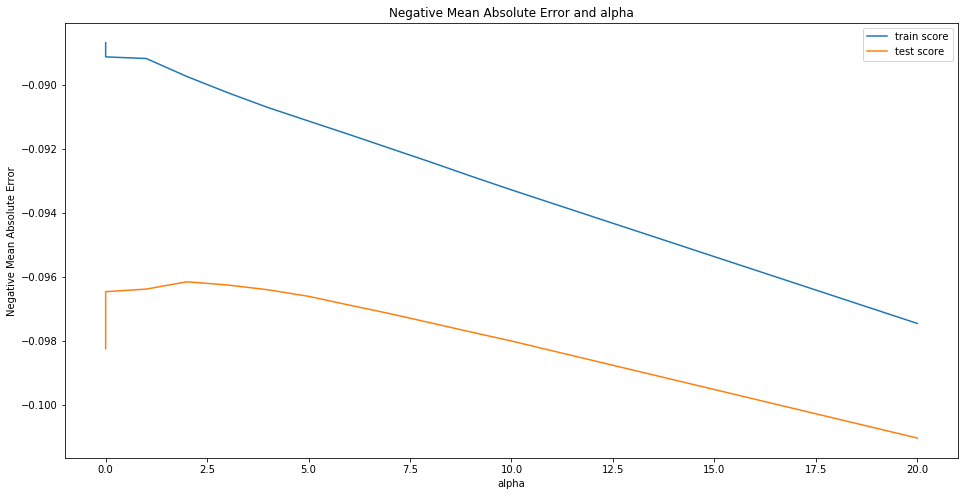

In [68]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,8))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [69]:
alpha = model_cv.best_estimator_.alpha
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.13746177,  0.17807273, -0.07719666, -0.06768104, -0.08720431,
       -0.05688244, -0.19484123, -0.14545446,  0.09896676, -0.07159452,
        0.13811908,  0.14062753, -0.09305051, -0.12914625, -0.10569269,
        0.09799199,  0.14398904, -0.06626534,  0.09911608, -0.08266898,
       -0.30452957, -0.08948027, -0.08720907, -0.05421339, -0.00479532,
        0.08164542,  0.18056726,  0.31247161,  0.10924321,  0.0444059 ,
        0.02145858,  0.06839352,  0.13098349,  0.17930284,  0.19803526,
        0.25889846, -0.13507265,  0.11206944, -0.15000485,  0.06074228,
        0.10528984, -0.12371494,  0.0643697 ,  0.11352433, -0.11033668,
       -0.25190228, -0.0898305 ,  0.08599701,  0.06522127,  0.09569895])

In [70]:
#printing the absolute values of columns coefficients to get better idea
#Sorting the df by absolute coefficient value
ridge_df = pd.DataFrame(list(zip(ridge.coef_, X_train.columns)), columns = ['Coefficient', 'Column']) 
ridge_df['abs_coeff'] = ridge_df.Coefficient.abs()
ridge_df.sort_values(by='abs_coeff', ascending=False)

Coefficient                    Column  abs_coeff
27     0.312472             OverallQual_9   0.312472
20    -0.304530             OverallQual_2   0.304530
35     0.258898             OverallCond_9   0.258898
45    -0.251902              Fireplaces_3   0.251902
34     0.198035             OverallCond_8   0.198035
6     -0.194841            MSSubClass_160   0.194841
26     0.180567             OverallQual_8   0.180567
33     0.179303             OverallCond_7   0.179303
1      0.178073                 GrLivArea   0.178073
38    -0.150005              ExterQual_Fa   0.150005
7     -0.145454            MSSubClass_180   0.145454
16     0.143989      Neighborhood_NridgHt   0.143989
11     0.140628      Neighborhood_Crawfor   0.140628
10     0.138119      Neighborhood_ClearCr   0.138119
0     -0.137462                 YearBuilt   0.137462
36    -0.135073       Exterior1st_BrkComm   0.135073
32     0.130983             OverallCond_6   0.130983
13    -0.129146       Neighborhood_IDOTRR   0.129146
41    -0.123715  BsmtExposure_No Basement   0.123715
43     0.113524            BsmtFullBath_2   0.113524
37     0.112069       Exterior1st_BrkFace   0.112069
44    -0.110337            BedroomAbvGr_5   0.110337
28     0.109243            OverallQual_10   0.109243
14    -0.105693      Neighborhood_MeadowV   0.105693
40     0.105290           BsmtExposure_Gd   0.105290
18     0.099116      Neighborhood_StoneBr   0.099116
8      0.098967               MSZoning_FV   0.098967
15     0.097992      Neighborhood_NoRidge   0.097992
49     0.095699     SaleCondition_Partial   0.095699
12    -0.093051      Neighborhood_Edwards   0.093051
46    -0.089831      GarageType_No Garage   0.089831
21    -0.089480             OverallQual_3   0.089480
22    -0.087209             OverallQual_4   0.087209
4     -0.087204             MSSubClass_90   0.087204
47     0.085997     SaleCondition_AdjLand   0.085997
19    -0.082669            BldgType_Twnhs   0.082669
25     0.081645             OverallQual_7   0.081645
2     -0.077197             MSSubClass_40   0.077197
9     -0.071595              LotShape_IR3   0.071595
31     0.068394             OverallCond_5   0.068394
3     -0.067681             MSSubClass_60   0.067681
17    -0.066265      Neighborhood_OldTown   0.066265
48     0.065221      SaleCondition_Normal   0.065221
42     0.064370            BsmtFullBath_1   0.064370
39     0.060742          Foundation_Stone   0.060742
5     -0.056882            MSSubClass_120   0.056882
23    -0.054213             OverallQual_5   0.054213
29     0.044406             OverallCond_2   0.044406
30     0.021459             OverallCond_4   0.021459
24    -0.004795             OverallQual_6   0.004795

In [71]:
from sklearn import metrics
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8886632006662559


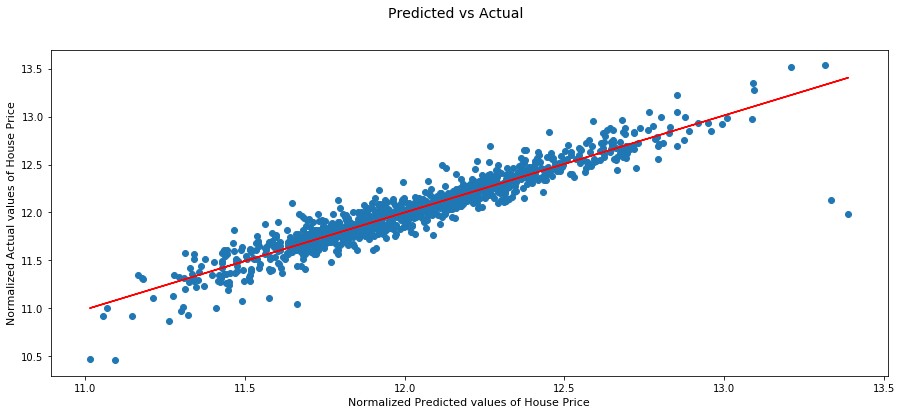

In [72]:
#Plotting the regression line
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Predicted vs Actual', fontsize = 14)   
m,b= np.polyfit(y_train_pred, y_train,1)
plt.scatter(y_train_pred,y_train)             
# Plot heading 
plt.xlabel('Normalized Predicted values of House Price', fontsize = 11) 
plt.ylabel('Normalized Actual values of House Price', fontsize = 11) 
plt.plot(y_train_pred, m*y_train_pred + b, 'r')

### Ridge Model Evaluation and Predictions on Test Data

In [73]:
#Assigning house price value in y_test and independent X variables in X_test
#Scaling the Test numeric data using the scaler object fitted with training data.
y_test = df_test.pop('SalePrice')
df_test[numeric_vars]= scaler.transform(df_test[numeric_vars])
X_test = df_test[top50features]
X_test

YearBuilt  GrLivArea  MSSubClass_40  MSSubClass_60  MSSubClass_90  \
1436   0.008299  -1.228053              0              0              0   
57    -1.079700   0.381706              0              1              0   
780   -0.782973  -0.496515              0              0              0   
382   -1.145639   0.526509              0              1              0   
1170  -0.189519  -0.750391              0              0              0   
...         ...        ...            ...            ...            ...   
509    0.403935  -0.895194              0              0              0   
555    1.623812  -0.882030              0              0              0   
399   -1.145639   0.062011              0              1              0   
545   -0.552185   1.252404              0              0              0   
266   -0.848912  -0.011331              0              1              0   

      MSSubClass_120  MSSubClass_160  MSSubClass_180  MSZoning_FV  \
1436               0               0               0            0   
57                 0               0               0            0   
780                0               0               0            0   
382                0               0               0            0   
1170               0               0               0            0   
...              ...             ...             ...          ...   
509                0               0               0            0   
555                0               0               0            0   
399                0               0               0            1   
545                0               0               0            0   
266                0               0               0            0   

      LotShape_IR3  Neighborhood_ClearCr  Neighborhood_Crawfor  \
1436             0                     0                     0   
57               0                     0                     0   
780              0                     0                     0   
382              0                     0                     0   
1170             0                     0                     0   
...            ...                   ...                   ...   
509              0                     0                     0   
555              0                     0                     0   
399              0                     0                     0   
545              0                     0                     0   
266              0                     0                     0   

      Neighborhood_Edwards  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
1436                     0                    0                     0   
57                       0                    0                     0   
780                      0                    0                     0   
382                      0                    0                     0   
1170                     0                    0                     0   
...                    ...                  ...                   ...   
509                      0                    0                     0   
555                      0                    0                     0   
399                      0                    0                     0   
545                      0                    0                     0   
266                      0                    0                     0   

      Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
1436                     0                     0                     0   
57                       0                     0                     0   
780                      0                     0                     0   
382                      0                     0                     0   
1170                     0                     0                     0   
...                    ...                   ...                   ...   
509                      0                     0                     0   
555           

In [74]:
#predicting the house price values using our final Ridge model.
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8713060890545089


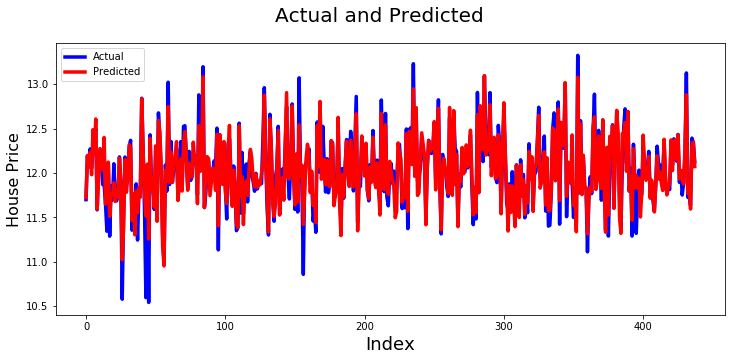

In [75]:
# Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure(figsize=(12,5))
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-", label="Actual")     
#Plotting Actual
plt.plot(c,y_test_pred, color="red",  linewidth=3.5, linestyle="-", label="Predicted")  
#Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              
# Plot heading 
plt.xlabel('Index', fontsize=18)                              
# X-label
plt.ylabel('House Price', fontsize=16)  
plt.legend(loc="upper left")

#### Ridge Model Analysis:-
1. The optimal alpha value is 2.0
2. Training R2 score is 0.8886 and Test R2 score is 0.8713 so the model is generalizing pretty well in the Test data.

### Build Lasso Regression model

In [76]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5

lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [77]:
cv_results = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.023196      0.009703         0.002802        0.000749      0.0001   
1       0.007401      0.001854         0.002400        0.000491       0.001   
2       0.005400      0.001020         0.002400        0.000802        0.01   
3       0.006601      0.001023         0.002399        0.000493        0.05   
4       0.006800      0.001166         0.003000        0.000894         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.091989          -0.096515          -0.109658   
1   {'alpha': 0.001}          -0.091427          -0.101696          -0.112556   
2    {'alpha': 0.01}          -0.124821          -0.145925          -0.147123   
3    {'alpha': 0.05}          -0.149883          -0.164605          -0.163189   
4     {'alpha': 0.1}          -0.175848          -0.184755          -0.183097   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.096651          -0.093620        -0.097681        0.006240   
1          -0.097201          -0.094229        -0.099414        0.007396   
2          -0.140649          -0.141894        -0.140068        0.008013   
3          -0.165530          -0.165807        -0.161791        0.006038   
4          -0.183126          -0.196353        -0.184627        0.006623   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.092495           -0.085499   
1                2           -0.096266           -0.091212   
2                3           -0.141044           -0.137081   
3                4           -0.164788           -0.157134   
4                5           -0.187139           -0.180002   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.085351           -0.090066           -0.091037   
1           -0.089794           -0.094286           -0.095039   
2           -0.136436           -0.137446           -0.139251   
3           -0.159014           -0.160303           -0.163130   
4           -0.182156           -0.183478           -0.186731   

   mean_train_score  std_train_score  
0         -0.088890         0.002933  
1         -0.093319         0.002427  
2         -0.138252         0.001680  
3         -0.160874         0.002764  
4         -0.183901         0.002717

In [78]:
#checking the value of optimum number of parameters
print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)

{'alpha': 0.0001}
-0.09768100051202598


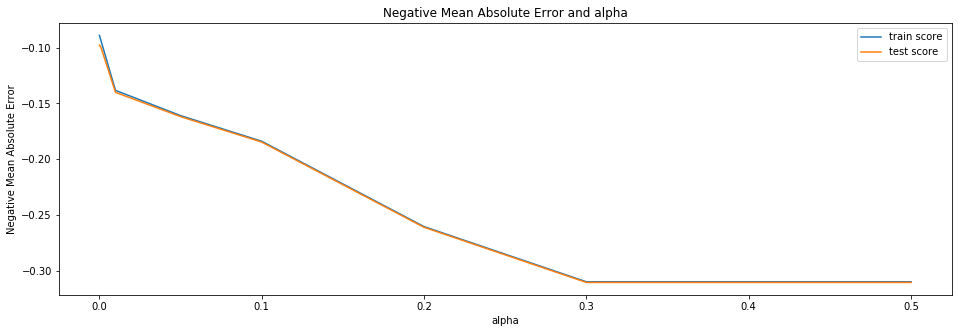

In [79]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [80]:
alpha = model_cv_lasso.best_estimator_.alpha
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.13489818,  0.17361114, -0.11004473, -0.06677476, -0.0869987 ,
       -0.06408182, -0.211627  , -0.19998781,  0.10514341, -0.06113501,
        0.15520481,  0.14244028, -0.08769152, -0.12754781, -0.08856517,
        0.10151404,  0.14162341, -0.0724375 ,  0.10494089, -0.07055085,
       -0.48448579, -0.02700061, -0.03382391, -0.        ,  0.0529505 ,
        0.14264051,  0.24675564,  0.40338542,  0.19271504,  0.08931184,
        0.07680474,  0.12555003,  0.18955849,  0.23821223,  0.26052077,
        0.34971018, -0.17086628,  0.11537422, -0.16224642,  0.06746764,
        0.10447401, -0.12691417,  0.06484167,  0.13474187, -0.11814495,
       -0.34353935, -0.08937846,  0.12260804,  0.06323138,  0.09248971])

In [81]:
lasso_df = pd.DataFrame(list(zip(lasso.coef_, X_train.columns)), columns = ['Coefficient', 'Column']) 
lasso_df['abs_coeff'] = lasso_df.Coefficient.abs()
lasso_df.sort_values(by='abs_coeff', ascending=False)

Coefficient                    Column  abs_coeff
20    -0.484486             OverallQual_2   0.484486
27     0.403385             OverallQual_9   0.403385
35     0.349710             OverallCond_9   0.349710
45    -0.343539              Fireplaces_3   0.343539
34     0.260521             OverallCond_8   0.260521
26     0.246756             OverallQual_8   0.246756
33     0.238212             OverallCond_7   0.238212
6     -0.211627            MSSubClass_160   0.211627
7     -0.199988            MSSubClass_180   0.199988
28     0.192715            OverallQual_10   0.192715
32     0.189558             OverallCond_6   0.189558
1      0.173611                 GrLivArea   0.173611
36    -0.170866       Exterior1st_BrkComm   0.170866
38    -0.162246              ExterQual_Fa   0.162246
10     0.155205      Neighborhood_ClearCr   0.155205
25     0.142641             OverallQual_7   0.142641
11     0.142440      Neighborhood_Crawfor   0.142440
16     0.141623      Neighborhood_NridgHt   0.141623
0     -0.134898                 YearBuilt   0.134898
43     0.134742            BsmtFullBath_2   0.134742
13    -0.127548       Neighborhood_IDOTRR   0.127548
41    -0.126914  BsmtExposure_No Basement   0.126914
31     0.125550             OverallCond_5   0.125550
47     0.122608     SaleCondition_AdjLand   0.122608
44    -0.118145            BedroomAbvGr_5   0.118145
37     0.115374       Exterior1st_BrkFace   0.115374
2     -0.110045             MSSubClass_40   0.110045
8      0.105143               MSZoning_FV   0.105143
18     0.104941      Neighborhood_StoneBr   0.104941
40     0.104474           BsmtExposure_Gd   0.104474
15     0.101514      Neighborhood_NoRidge   0.101514
49     0.092490     SaleCondition_Partial   0.092490
46    -0.089378      GarageType_No Garage   0.089378
29     0.089312             OverallCond_2   0.089312
14    -0.088565      Neighborhood_MeadowV   0.088565
12    -0.087692      Neighborhood_Edwards   0.087692
4     -0.086999             MSSubClass_90   0.086999
30     0.076805             OverallCond_4   0.076805
17    -0.072438      Neighborhood_OldTown   0.072438
19    -0.070551            BldgType_Twnhs   0.070551
39     0.067468          Foundation_Stone   0.067468
3     -0.066775             MSSubClass_60   0.066775
42     0.064842            BsmtFullBath_1   0.064842
5     -0.064082            MSSubClass_120   0.064082
48     0.063231      SaleCondition_Normal   0.063231
9     -0.061135              LotShape_IR3   0.061135
24     0.052950             OverallQual_6   0.052950
22    -0.033824             OverallQual_4   0.033824
21    -0.027001             OverallQual_3   0.027001
23    -0.000000             OverallQual_5   0.000000

In [82]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8919652289148601


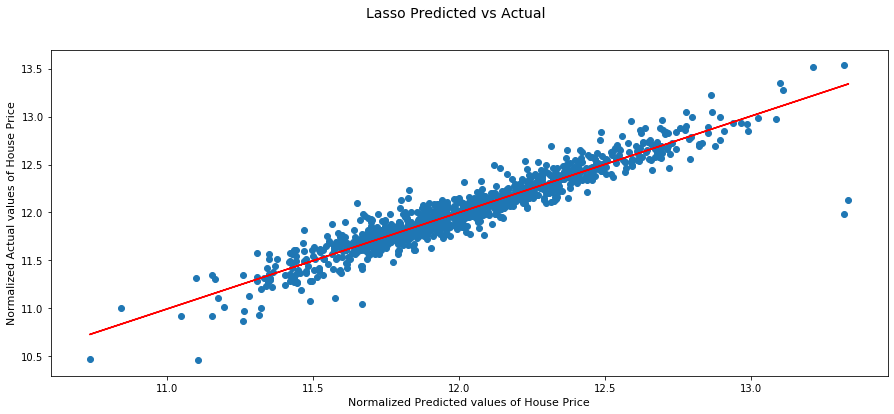

In [83]:
#Plotting the regression line
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Lasso Predicted vs Actual', fontsize = 14)   
m,b= np.polyfit(y_train_pred, y_train,1)
plt.scatter(y_train_pred,y_train)             
# Plot heading 
plt.xlabel('Normalized Predicted values of House Price', fontsize = 11) 
plt.ylabel('Normalized Actual values of House Price', fontsize = 11) 
plt.plot(y_train_pred, m*y_train_pred + b, 'r')

### Lasso Model Evaluation and Predictions on Test Data

In [84]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8705867281227105


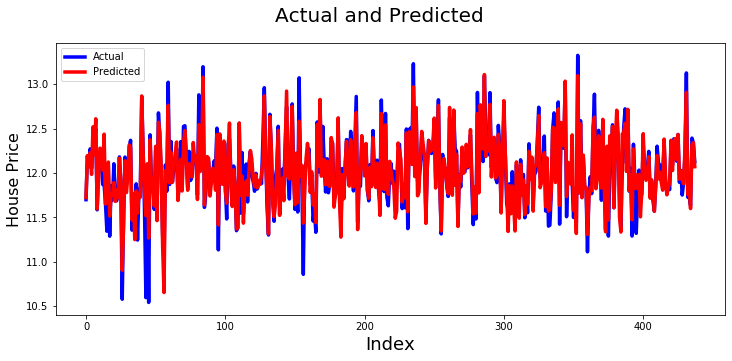

In [85]:
# Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure(figsize=(12,5))
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-", label="Actual")     
#Plotting Actual
plt.plot(c,y_test_pred, color="red",  linewidth=3.5, linestyle="-", label="Predicted")  
#Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              
# Plot heading 
plt.xlabel('Index', fontsize=18)                              
# X-label
plt.ylabel('House Price', fontsize=16)  
plt.legend(loc="upper left")

#### Lasso Model Analysis:-
1. The optimal alpha value is 0.0001
2. Training R2 score is 0.8919 and Test R2 score is 0.8705 so the model is generalizing pretty well in the Test data.

## Conclusion

1. The optimal alpha value of Ridge Regression is 2
2. The optimal alpha value of Lasso Regression is 0.0001
3. I have choosen Lasso over Ridge because Ridge and Lasso have very similar R2 scores but Lasso model is simpler as it has made the coefficient of OverallQual_5 as 0.0. Notice that OverallQual_5 had a very high VIF value as well. So Lasso model has taken care of multicollinearity automatically.
4. Top 20 features selected by Lasso are:-
   Coefficient Column 	
    -0.484486 	OverallQual_2 	
    0.403385 	OverallQual_9 	
    0.349710 	OverallCond_9 	
    -0.343539 	Fireplaces_3 	
    0.260521 	OverallCond_8 	
    0.246756 	OverallQual_8 	
    0.238212 	OverallCond_7 	
    -0.211627 	MSSubClass_160 	
    -0.199988 	MSSubClass_180 	
    0.192715 	OverallQual_10 	
    0.189558 	OverallCond_6 	
    0.173611 	GrLivArea 	
    -0.170866 	Exterior1st_BrkComm 	
    -0.162246 	ExterQual_Fa 	
    0.155205 	Neighborhood_ClearCr 	
    0.142641 	OverallQual_7 	
    0.142440 	Neighborhood_Crawfor 	
    0.141623 	Neighborhood_NridgHt
    -0.134898 	YearBuilt (age of the property)
    0.134742 	BsmtFullBath_2
4. The impact(postive, negative and magnitude) of above variables on the house price can be found out by looking at the  coefficient table which was printed previously.
5. Overall quality and condition of the property has high impact on the sale price.

## Assignment part 2-  Question 1

In [86]:
2*model_cv.best_estimator_.alpha

4.0

In [87]:
alpha = 2*model_cv.best_estimator_.alpha
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_
#printing the absolute values of columns coefficients to get better idea
#Sorting the df by absolute coefficient value
ridge_df = pd.DataFrame(list(zip(ridge.coef_, X_train.columns)), columns = ['Coefficient', 'Column']) 
ridge_df['abs_coeff'] = ridge_df.Coefficient.abs()
ridge_df.sort_values(by='abs_coeff', ascending=False)

Coefficient                    Column  abs_coeff
27     0.274396             OverallQual_9   0.274396
20    -0.211842             OverallQual_2   0.211842
35     0.199962             OverallCond_9   0.199962
45    -0.191648              Fireplaces_3   0.191648
1      0.181219                 GrLivArea   0.181219
6     -0.179382            MSSubClass_160   0.179382
26     0.161955             OverallQual_8   0.161955
34     0.157428             OverallCond_8   0.157428
33     0.141546             OverallCond_7   0.141546
16     0.141460      Neighborhood_NridgHt   0.141460
0     -0.139404                 YearBuilt   0.139404
11     0.135493      Neighborhood_Crawfor   0.135493
38    -0.131284              ExterQual_Fa   0.131284
13    -0.124559       Neighborhood_IDOTRR   0.124559
10     0.121360      Neighborhood_ClearCr   0.121360
41    -0.119493  BsmtExposure_No Basement   0.119493
7     -0.114801            MSSubClass_180   0.114801
37     0.105789       Exterior1st_BrkFace   0.105789
40     0.105717           BsmtExposure_Gd   0.105717
36    -0.102510       Exterior1st_BrkComm   0.102510
14    -0.101819      Neighborhood_MeadowV   0.101819
21    -0.098727             OverallQual_3   0.098727
22    -0.098165             OverallQual_4   0.098165
44    -0.096065            BedroomAbvGr_5   0.096065
49     0.094996     SaleCondition_Partial   0.094996
12    -0.094851      Neighborhood_Edwards   0.094851
32     0.093277             OverallCond_6   0.093277
43     0.091685            BsmtFullBath_2   0.091685
46    -0.090387      GarageType_No Garage   0.090387
8      0.090197               MSZoning_FV   0.090197
15     0.090064      Neighborhood_NoRidge   0.090064
19    -0.089677            BldgType_Twnhs   0.089677
18     0.085581      Neighborhood_StoneBr   0.085581
4     -0.084996             MSSubClass_90   0.084996
28     0.078883            OverallQual_10   0.078883
9     -0.066472              LotShape_IR3   0.066472
3     -0.066147             MSSubClass_60   0.066147
23    -0.065686             OverallQual_5   0.065686
25     0.065391             OverallQual_7   0.065391
42     0.064636            BsmtFullBath_1   0.064636
48     0.064073      SaleCondition_Normal   0.064073
17    -0.060615      Neighborhood_OldTown   0.060615
47     0.054656     SaleCondition_AdjLand   0.054656
2     -0.048274             MSSubClass_40   0.048274
5     -0.047956            MSSubClass_120   0.047956
39     0.043600          Foundation_Stone   0.043600
31     0.031938             OverallCond_5   0.031938
24    -0.019210             OverallQual_6   0.019210
29     0.016357             OverallCond_2   0.016357
30    -0.014038             OverallCond_4   0.014038

In [88]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.884499304487236


In [89]:
#lets predict the R-squared value of test and train data
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8691097290122929


In [90]:
2*model_cv_lasso.best_estimator_.alpha

0.0002

In [91]:
alpha = 2*model_cv_lasso.best_estimator_.alpha
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 
lasso.coef_
lasso_df = pd.DataFrame(list(zip(lasso.coef_, X_train.columns)), columns = ['Coefficient', 'Column']) 
lasso_df['abs_coeff'] = lasso_df.Coefficient.abs()
lasso_df.sort_values(by='abs_coeff', ascending=False)

Coefficient                    Column  abs_coeff
20    -0.457293             OverallQual_2   0.457293
27     0.397554             OverallQual_9   0.397554
45    -0.319557              Fireplaces_3   0.319557
35     0.290377             OverallCond_9   0.290377
26     0.243267             OverallQual_8   0.243267
34     0.208841             OverallCond_8   0.208841
6     -0.206932            MSSubClass_160   0.206932
33     0.187215             OverallCond_7   0.187215
7     -0.180240            MSSubClass_180   0.180240
28     0.179483            OverallQual_10   0.179483
1      0.175760                 GrLivArea   0.175760
36    -0.169392       Exterior1st_BrkComm   0.169392
38    -0.153746              ExterQual_Fa   0.153746
10     0.146869      Neighborhood_ClearCr   0.146869
11     0.140667      Neighborhood_Crawfor   0.140667
25     0.139407             OverallQual_7   0.139407
32     0.138271             OverallCond_6   0.138271
16     0.138086      Neighborhood_NridgHt   0.138086
0     -0.136311                 YearBuilt   0.136311
41    -0.125933  BsmtExposure_No Basement   0.125933
13    -0.123404       Neighborhood_IDOTRR   0.123404
43     0.113746            BsmtFullBath_2   0.113746
37     0.112082       Exterior1st_BrkFace   0.112082
44    -0.110108            BedroomAbvGr_5   0.110108
40     0.104278           BsmtExposure_Gd   0.104278
8      0.100837               MSZoning_FV   0.100837
18     0.096910      Neighborhood_StoneBr   0.096910
15     0.095618      Neighborhood_NoRidge   0.095618
49     0.090538     SaleCondition_Partial   0.090538
14    -0.089386      Neighborhood_MeadowV   0.089386
46    -0.089240      GarageType_No Garage   0.089240
12    -0.089120      Neighborhood_Edwards   0.089120
4     -0.083177             MSSubClass_90   0.083177
31     0.074309             OverallCond_5   0.074309
19    -0.070492            BldgType_Twnhs   0.070492
47     0.068083     SaleCondition_AdjLand   0.068083
17    -0.067200      Neighborhood_OldTown   0.067200
3     -0.065621             MSSubClass_60   0.065621
42     0.064820            BsmtFullBath_1   0.064820
2     -0.064143             MSSubClass_40   0.064143
48     0.060866      SaleCondition_Normal   0.060866
5     -0.058084            MSSubClass_120   0.058084
9     -0.054686              LotShape_IR3   0.054686
24     0.049855             OverallQual_6   0.049855
22    -0.032941             OverallQual_4   0.032941
39     0.032464          Foundation_Stone   0.032464
21    -0.027971             OverallQual_3   0.027971
30     0.021846             OverallCond_4   0.021846
29     0.001354             OverallCond_2   0.001354
23    -0.000000             OverallQual_5   0.000000

In [92]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8905383727951928


In [93]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8715848435917256
